# **Background and Objective**

Customer churn is a major challenge in the banking industry due to increasing competition and rising customer expectations. Retaining existing customers is often more cost-effective than acquiring new ones, which makes churn prediction an essential task.

The objective of this project is to build a churn prediction model that can identify customers at high risk of leaving the bank. The model leverages customer-related data such as:

Demographics

Transaction history

Account activity

Customer interactions

By applying machine learning and predictive analytics, the project aims to uncover hidden patterns in customer behavior and highlight factors that strongly influence churn. These insights can help banks:

Develop targeted retention strategies

Enhance customer experience

Reduce churn rates

Improve customer relationship management

#  Dataset Description

The dataset contains information about bank customers, with the target variable being customer churn (Attrition_Flag). Each row represents one customer, and the features include demographics, account details, and transaction behavior.

Key Columns:

CLIENTNUM – Unique identifier for each customer (not useful for modeling).

Attrition_Flag – Target variable; indicates churn status (Attrited Customer or Existing Customer).

Customer_Age – Age of the customer. Different age groups may show different churn behaviors.

Gender – Gender of the customer (Male, Female).

Dependent_count – Number of dependents; may affect financial decisions and churn risk.

Education_Level – Highest education attained (High School, Graduate, etc.).

Marital_Status – Marital status of the customer (Single, Married, etc.).

Income_Category – Income range of the customer (<40K, 40K–60K, etc.); often linked to financial behavior.

Card_Category – Type of credit card (Blue, Silver, Gold, etc.); may indicate engagement level.

Months_on_book – Duration of customer relationship (in months).

Total_Relationship_Count – Number of products held with the bank (higher usually means more loyalty).

Months_Inactive_12_mon – Number of inactive months in the last 12 months (higher inactivity → churn risk).

Contacts_Count_12_mon – Number of customer service contacts in the past 12 months (frequent contact can indicate dissatisfaction).

Credit_Limit – Credit limit of the card; reflects customer value.

Total_Revolving_Bal – Total revolving balance on the card.

Avg_Open_To_Buy – Average remaining credit line (Credit_Limit – Balance).

Total_Amt_Chng_Q4_Q1 – Change in transaction amount (Q4 vs Q1); measures spending trend.

Total_Trans_Amt – Total transaction amount during the period; a measure of engagement.

Total_Trans_Ct – Total number of transactions during the period; higher activity usually means lower churn.

Total_Ct_Chng_Q4_Q1 – Change in transaction count (Q4 vs Q1); indicates change in engagement.

Avg_Utilization_Ratio – Proportion of credit limit used; shows spending habits.

Unnamed: 21 – Likely an extra/unnecessary column created during export; should be dropped.

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [16]:
file_path = "BankChurners.csv"
df = pd.read_csv(file_path)
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (10127, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [17]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# Summary of Raw Data

The dataset contains 10,000+ rows and 21 columns.

CLIENTNUM is simply a customer ID and does not provide predictive value (can be dropped).

Attrition_Flag is the target variable (churn vs. non-churn).

Several columns (e.g., Gender, Marital_Status, Education_Level, Card_Category) are categorical features. These will need to be encoded before modeling.

An extra column (Unnamed: 21) contains no useful information and can be dropped.

The dataset also includes many numeric features (e.g., transaction counts, credit limit, utilization ratio), which are likely very informative for churn prediction.

Additional insights may be extracted by feature engineering, such as combining transaction-based columns or deriving ratios.

# **DATA PREPROCESSING**

In [19]:
df.columns=df.columns.str.lower() # lowercase the columns names

# **RENAMING THE TARGET VARIABALE**

In [20]:
df.rename(columns={'attrition_flag':'churn'},inplace=True)

In [21]:
df.columns

Index(['clientnum', 'churn', 'customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

In [22]:
df['churn'].values

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Attrited Customer', 'Attrited Customer', 'Attrited Customer'],
      dtype=object)

In [23]:
df['churn'].replace(['Existing Customer','Attrited Customer'], [0,1], inplace=True)
df['churn'].value_counts()


,count
churn,
0,8500
1,1627


In [24]:
df['churn'].unique()

array([0, 1])

Convert to categorical type Convert to categorical type for efficiency and because ML models can't directly work with objects/strings, so these columns need to become encoded eventually anyway.

In [25]:
df=df.astype({'gender':'category','education_level':'category','marital_status':'category','income_category':'category','card_category':'category'})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   clientnum                 10127 non-null  int64   
 1   churn                     10127 non-null  int64   
 2   customer_age              10127 non-null  int64   
 3   gender                    10127 non-null  category
 4   dependent_count           10127 non-null  int64   
 5   education_level           10127 non-null  category
 6   marital_status            10127 non-null  category
 7   income_category           10127 non-null  category
 8   card_category             10127 non-null  category
 9   months_on_book            10127 non-null  int64   
 10  total_relationship_count  10127 non-null  int64   
 11  months_inactive_12_mon    10127 non-null  int64   
 12  contacts_count_12_mon     10127 non-null  int64   
 13  credit_limit              10127 non-null  floa

In [27]:
#checking missing values
df.isnull().sum()

,0
clientnum,0
churn,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0


In [28]:
#Dropping Unnecessary Columns


df.drop(columns='clientnum',inplace=True)

In [29]:
# Check how many entries of each marital status we have
print(df['marital_status'].value_counts())

# Fill missing or 'unknown' values with the most frequent value ('Married')
most_common_status = df['marital_status'].mode()[0]  # finds 'Married'
df['marital_status'].replace('unknown', most_common_status, inplace=True)

# Verify changes
print(df['marital_status'].value_counts())


marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


**This method has a few advantages:**

1.**Preserves data distributon:** It doesn't artificially increase the frequency of any existing category, which is important when dealing with imbalanced data.

2.**Keeps Information**: By labeling missing values explicitly, you retain the information that data was missing, which could be relevant for model performance.

3.**Prevents Bias:** It avoids introducing bias that could occur if a frequent category is disproportionately favored.

In [30]:
df.marital_status.value_counts()

,count
marital_status,
Married,4687
Single,3943
Unknown,749
Divorced,748


In [31]:
#education levels
df['education_level'].value_counts()

,count
education_level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [32]:
#income category
df['income_category'].value_counts()

,count
income_category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In [33]:
# Replace 'Unknown' with 'Missing' in the 'education_level' column
df['education_level'].replace(to_replace='Unknown', value='Missing', inplace=True)

df['education_level'].value_counts()

,count
education_level,
Graduate,3128
High School,2013
Missing,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [34]:
# Replace 'Unknown' with 'Missing' in the 'education_level' column
df['income_category'].replace(to_replace='Unknown', value='Missing', inplace=True)

df['income_category'].value_counts()

,count
income_category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Missing,1112
$120K +,727


In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.nunique().to_frame(name='Count of Unique values')

,Count of Unique values
churn,2
customer_age,45
gender,2
dependent_count,6
education_level,7
marital_status,4
income_category,6
card_category,4
months_on_book,44
total_relationship_count,6


In [37]:
df.apply(pd.unique).to_frame(name='Unique Values ')

,Unique Values
churn,"[0, 1]"
customer_age,"[45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 3..."
gender,"['M', 'F'] Categories (2, object): ['F', 'M']"
dependent_count,"[3, 5, 4, 2, 0, 1]"
education_level,"['High School', 'Graduate', 'Uneducated', 'Mis..."
marital_status,"['Married', 'Single', 'Unknown', 'Divorced'] C..."
income_category,"['$60K - $80K', 'Less than $40K', '$80K - $120..."
card_category,"['Blue', 'Gold', 'Silver', 'Platinum'] Categor..."
months_on_book,"[39, 44, 36, 34, 21, 46, 27, 31, 54, 30, 48, 3..."
total_relationship_count,"[5, 6, 4, 3, 2, 1]"


# **EDA (Exploratory Data Analysis)**

**Basic** **Statistics**

In [38]:
df.describe().style.background_gradient()

,churn,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Summary (MEAN)

1.Age is :46

2.Dependents is: 2

3.Months on book is :36

4.relationship count is 4

5.Months inactive in last year is 2

6.contacts in last year is 3

7.Credit limit is $8,632

8.Revolving balance is $1,162

9.Change in transaction amnt between Q4-Q1 is 0.8

10.Total transaction amnt is $4,404

11.Total transaction count is 65

12.Change in transaction count between Q4-Q1 is 0.7

13.Card utilisation ratio is 0.3

14.Churn is 0.2 (which means 20%, rounded) of the customer records are for churned customers.

**“This summary helps identify key patterns and outliers, which can guide feature engineering and model selection.”**

In [39]:
df.describe(exclude=np.number, include='category')

,gender,education_level,marital_status,income_category,card_category
count,10127,10127,10127,10127,10127
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,5358,3128,4687,3561,9436


So this bank's **customer base** mostly comprises of:

1.Females(out of 2 categories, representing over 1/2 of customer-base)

2.Graduate level education (out of 7 categories, 1/3rd of the customer-base)

3.Seems like a large bias towards grads.

4.Married (out of 4 categories, just less than half of customer-base Also seems strongly biased towards married people. 5.Incomes of less than $40k (out of 6 categories)

6.Again strong bias towards incomes less than $40k.

7.Blue card customers (out of 4 categories, almost 95% of customer base!) Heavily biased towards blue card holders. Must be the standard option.

<function matplotlib.pyplot.show(close=None, block=None)>

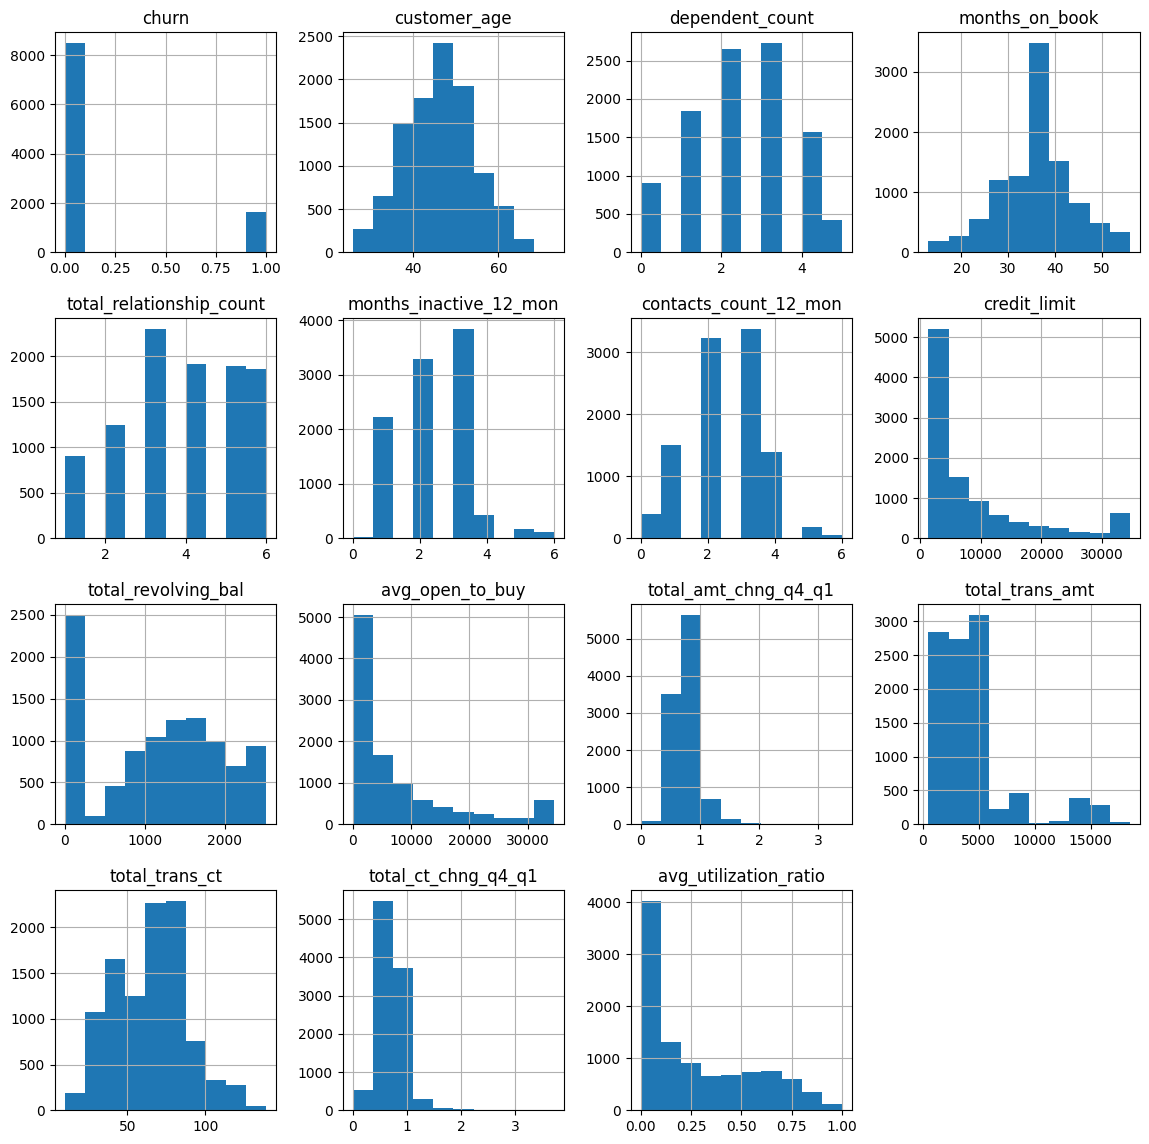

In [40]:
df.hist(figsize=(14,14))
plt.show

1.most frequent dependent count is 3 and 4


2.customer_age looks quite normally distributed, with peak just over 40.

3.dependent_count also looks normally distributed, peaking between 2 and 3 dependents.

4.months_on_book histogram is poorly scaled but looks normal, with an unusual spike at around 35months. Was there some large promotional drive 30months ago that explains this?

5.total_relationship count is reasonably uniform rather than normal, between

# **Corelation matrix**
Correlation is a statistical measure that describes the strength and direction of a linear relationship between two variables. In other words, it quantifies how one variable changes with respect to another variable. Here are the key points about correlation:

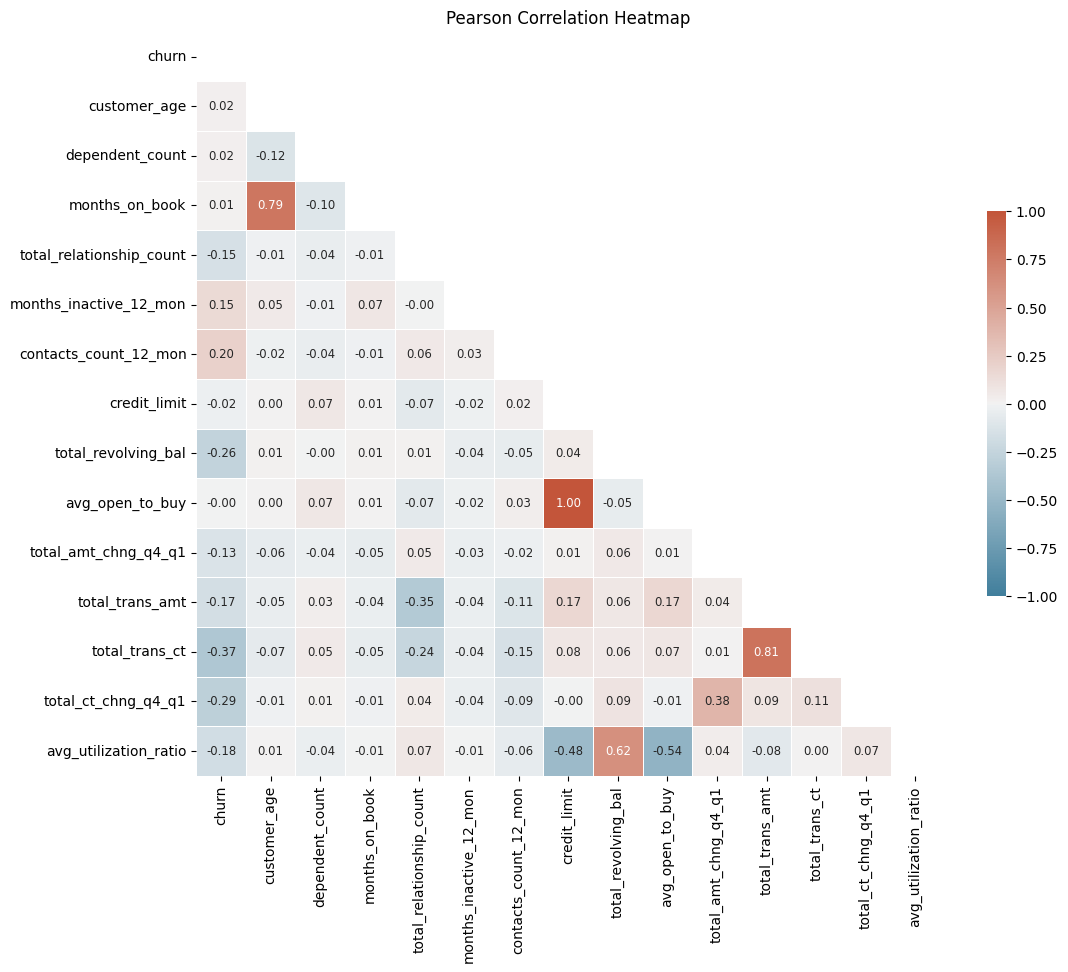

In [41]:
# Select only the numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

def plot_corr_matrix(df):
    """Plots a formatted correlation matrix for the supplied dataframe."""


    fig, ax = plt.subplots(figsize=(12, 10))


    corr_mat = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))


    cmap = sns.diverging_palette(230, 20, as_cmap=True)


    sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                annot=True, fmt='.2f', annot_kws={'fontsize':'small'})

    ax.set_title('Pearson Correlation Heatmap')


plot_corr_matrix(numeric_df)

# **Summery on corelation matrix**

1.months_on_book vs customer_age

2.total_trans_amt vs total_relationship_count

3.total_trans_ct vs total_relationship_count

4.**avg_open_to_buy vs credit_limit** **Very co-linear**, makes sense as customers with high credit-limit are probably the ones who are quire open to having even more credit.

5.avg_utilisation_ratio vs credit_limit

6.avg_utilisation_ratio vs total_revolving_bal

7.avg_utilisation_ratio vs avg_open_to_buy

8.total_ct_chng_q4_q1 vs total_amt_chng_q4_q1

These 2 features are inter-related, so makes sense to be highly positive correlation. 9.total_transaction_ct vs total_trans_amt

Again these 2 features are inter-related, so makes sense to be highly positive correlation. For clarity, print out a list of correlation coeffs vs the dependent variable "churn"

In [42]:
#since avg_to_buy and credit limit both are highly coreelated data and credit_limit is
#more corelated with churn if we compare with avg_open_buy
#and total_trans_amount and total_trans_ct both are silimar

# **UNIVARIATE ANALYSIS**

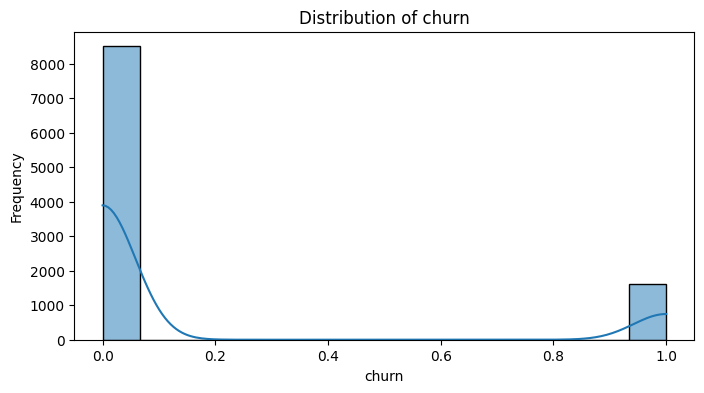

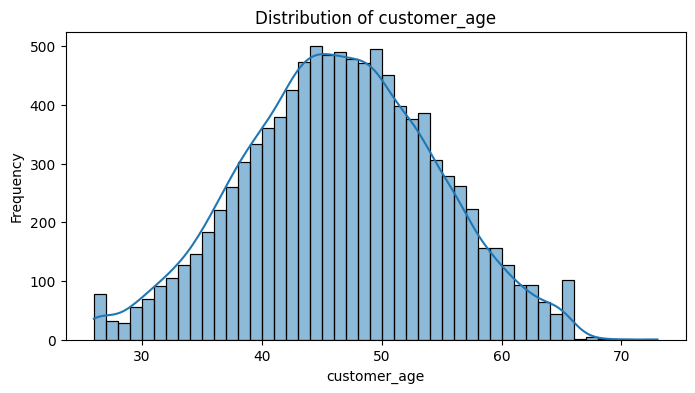

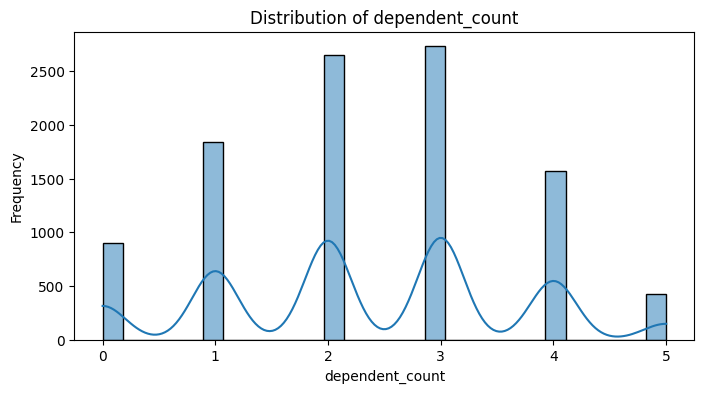

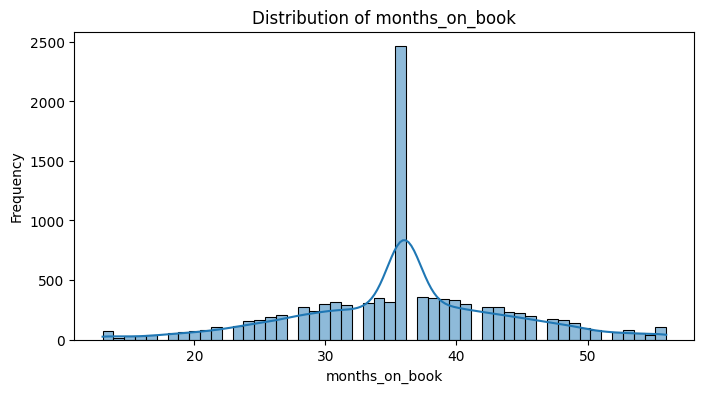

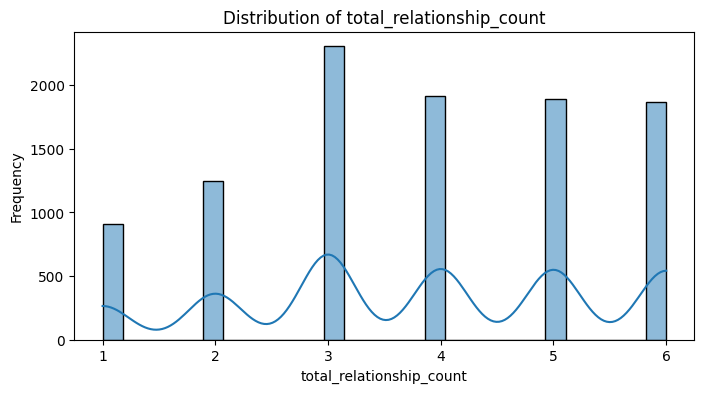

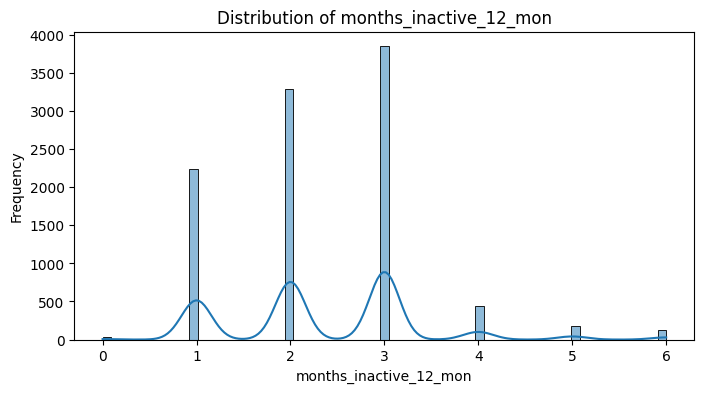

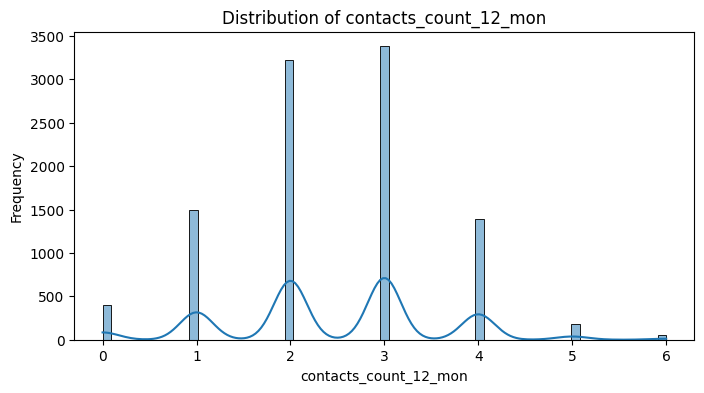

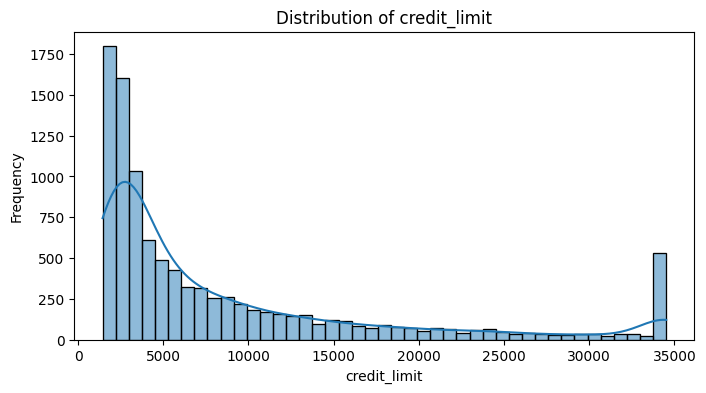

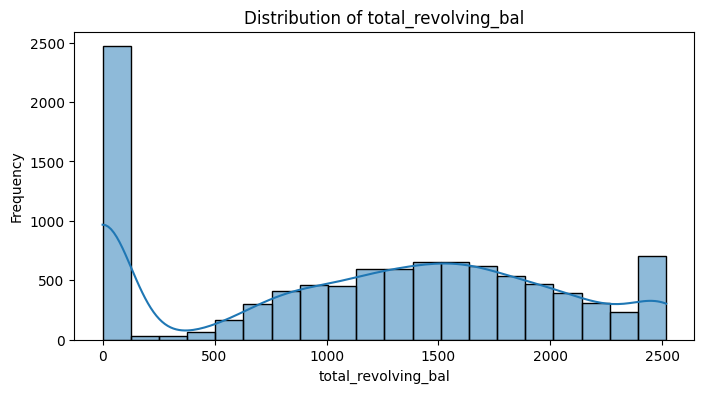

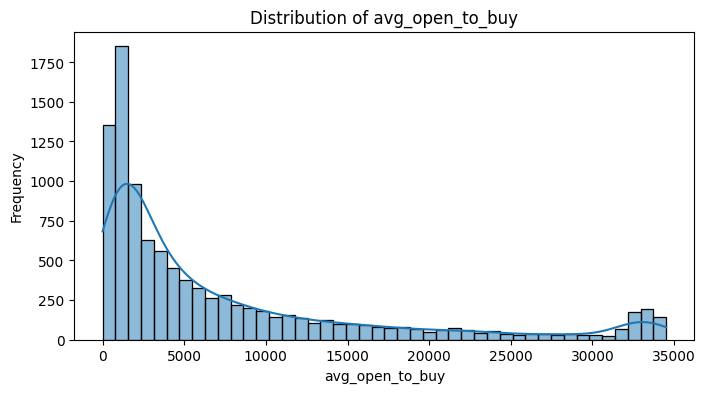

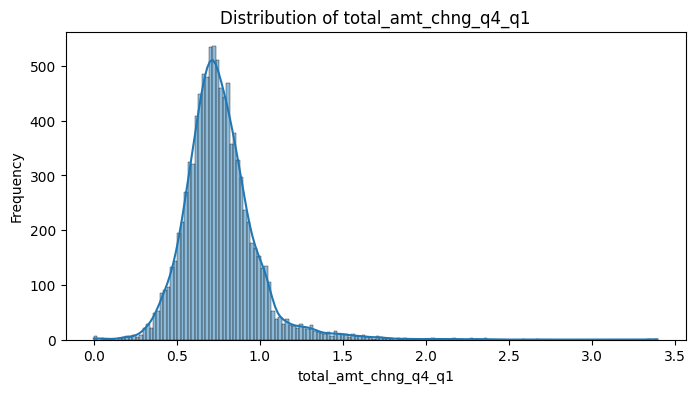

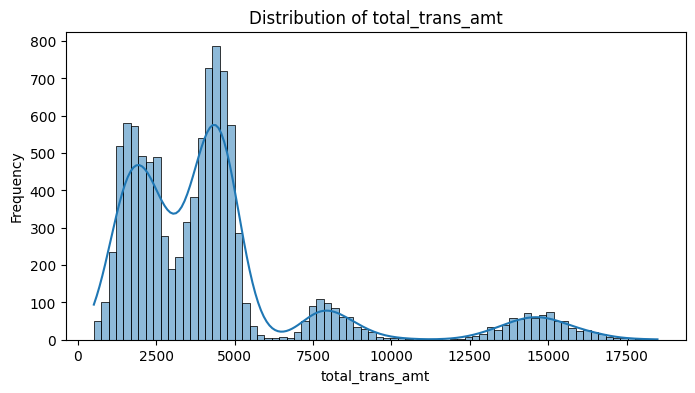

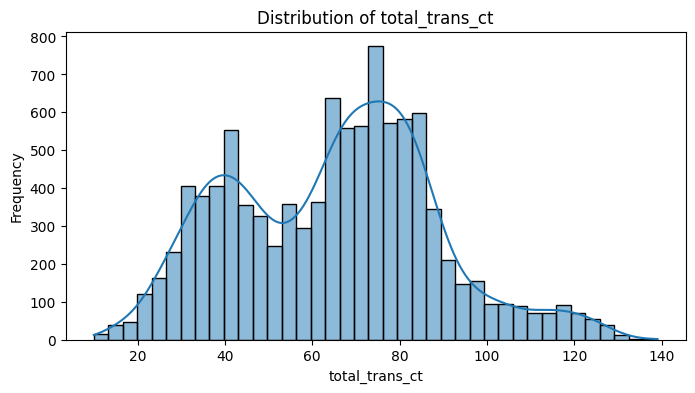

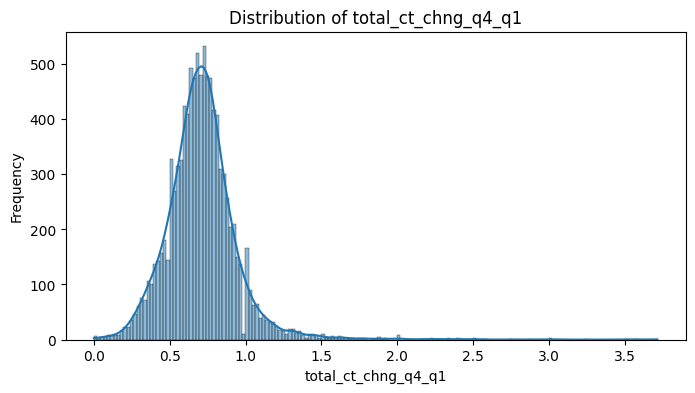

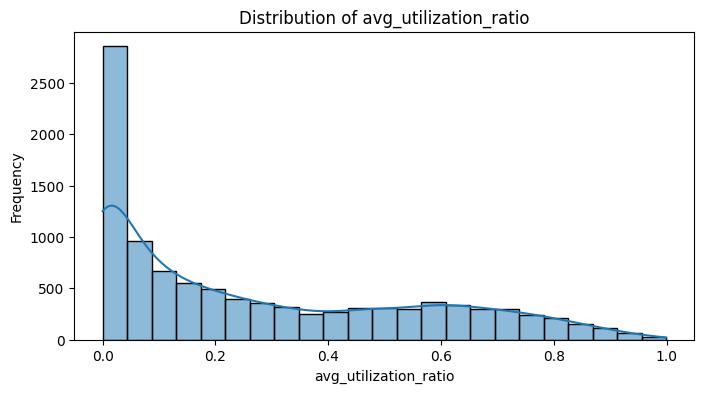

In [43]:
import seaborn as sns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Assuming df is your DataFrame
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [44]:
#checking the skewness of the numeric variables
for col in numeric_columns:
    print(f'Skewness of {col}: {df[col].skew()}')

Skewness of churn: 1.8484488579523548
Skewness of customer_age: -0.033605016317173456
Skewness of dependent_count: -0.020825535616339912
Skewness of months_on_book: -0.10656535989402989
Skewness of total_relationship_count: -0.16245241498173682
Skewness of months_inactive_12_mon: 0.6330611289713137
Skewness of contacts_count_12_mon: 0.011005626218976492
Skewness of credit_limit: 1.666725807993647
Skewness of total_revolving_bal: -0.14883725028007228
Skewness of avg_open_to_buy: 1.6616965459311595
Skewness of total_amt_chng_q4_q1: 1.7320634114286038
Skewness of total_trans_amt: 2.0410034025756936
Skewness of total_trans_ct: 0.15367306849872275
Skewness of total_ct_chng_q4_q1: 2.0640305679077477
Skewness of avg_utilization_ratio: 0.7180079967731994


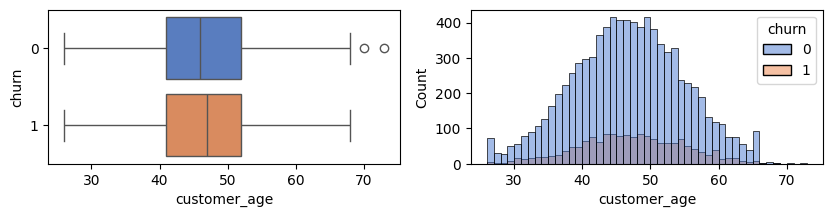

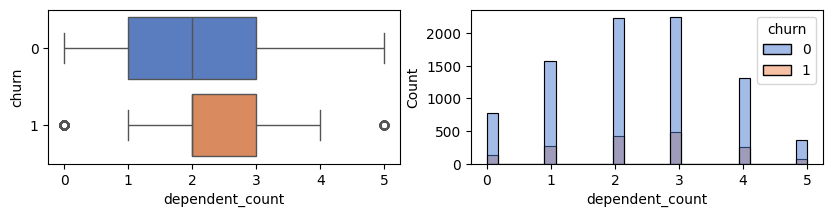

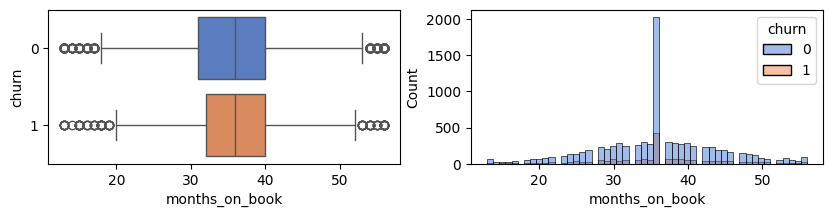

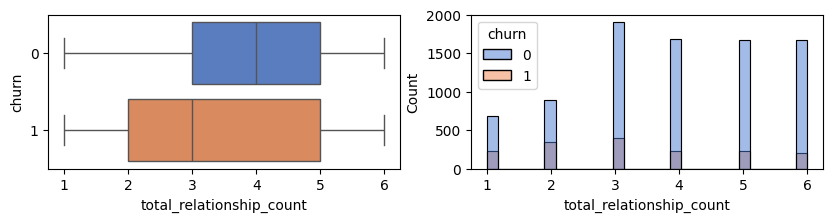

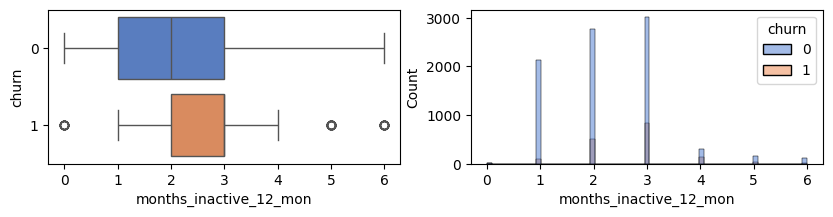

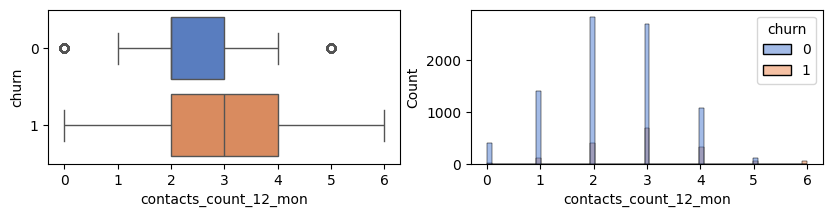

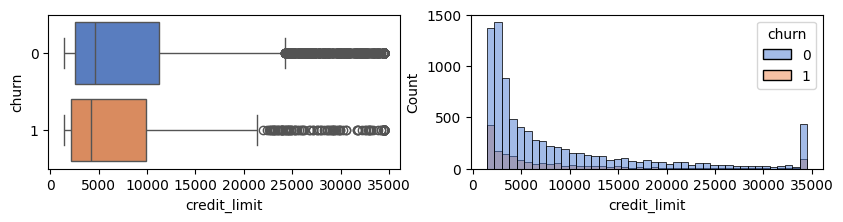

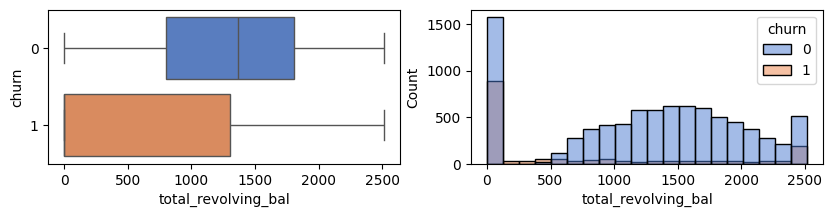

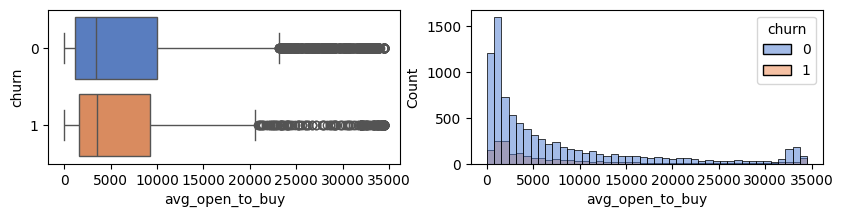

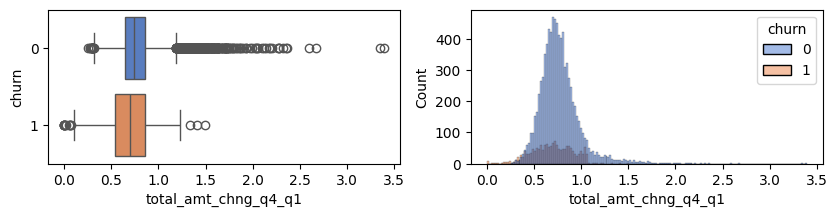

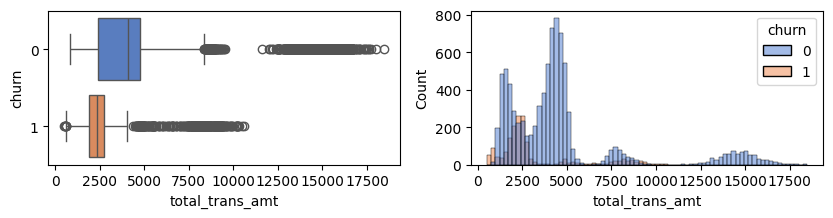

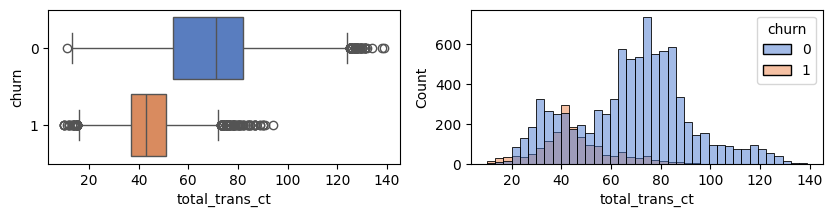

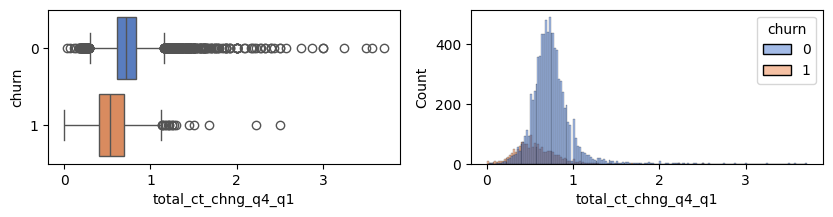

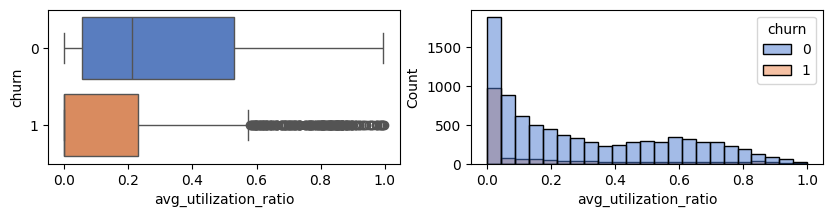

In [45]:
def plot_vs_churn(df,col):
    ''' plot a side-by-side boxplot and histogram for  both churn==0and 1'''
    fig=plt.figure(figsize=(10,2))
    ax=fig.add_subplot(1,2,1)
    sns.boxplot(data=df,x=col,y='churn',orient='h', palette='muted')

    ax=fig.add_subplot(1,2,2)
    sns.histplot(data=df,x=col,hue='churn', palette='muted')
    #fig.subtitle(f'Distributions of "{col}" grouped by "churn")

for col in numeric_df:
                 if col=='churn':continue
                 plot_vs_churn(df,col)

Transformations can reduce the influence of extreme values, making them less impactful on the model

# **VISUALIZATION**

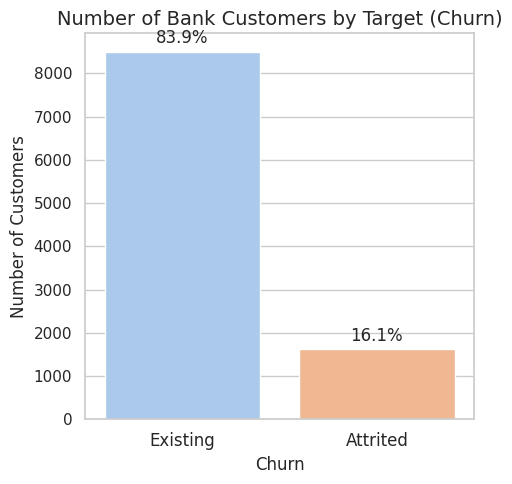

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme(style="whitegrid")

# Plot title
chart = 'Number of Bank Customers by Target (Churn)'
plt.figure(figsize=(5,5))
plt.title(chart, fontsize=14)

# Countplot for target variable
gp = sns.countplot(x='churn', data=df, palette='pastel')
gp.set(ylabel='Number of Customers', xlabel='Churn')
plt.xticks([0,1], ['Existing', 'Attrited'], fontsize=12)

# Annotate percentages on each bar
total = len(df['churn'])
for p in gp.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    gp.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2, height + total*0.01),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


The graph above shows the distribution of the target variable, it is known that the number of Churn bank customer is 16.1%. It is concluded that there is an imbalance in the data on the target variable.

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

def countplot_univariate(data, column, hue=None, label=None, max_sample=0, num_x_ticks=0, x_ticks=None,
                         width=8, height=5, y_title=1.0, orient='vertical', title=''):
    """
    Plots a flexible annotated countplot for a categorical variable.

    Parameters:
    - data: DataFrame
    - column: Column to plot
    - hue: Optional grouping column
    - label: Axis label
    - max_sample: Max number of categories to display (0 = all)
    - num_x_ticks: Number of x-axis ticks to customize
    - x_ticks: Custom tick labels
    - width, height: Figure size
    - y_title: Vertical position of title
    - orient: 'vertical' or 'horizontal'
    - title: Plot title
    """

    plt.figure(figsize=(width, height))
    plt.suptitle(title, y=y_title, fontsize=14)

    # Determine category order
    order = data[column].value_counts().nlargest(max_sample).index if max_sample > 0 else data[column].value_counts().index

    # Create countplot
    if orient == 'vertical':
        g = sns.countplot(x=column, hue=hue, order=order, data=data, palette='pastel')
        g.set(xlabel=label, ylabel='Number')
    else:
        g = sns.countplot(y=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel='Number', ylabel=label)

    # Customize legend
    plt.legend(title='Exited', labels=['Exist', 'Attrited'], fontsize=11)

    # Customize x-axis ticks
    if num_x_ticks > 0 and x_ticks:
        plt.xticks(range(num_x_ticks), x_ticks, fontsize=11)

    # Annotate percentages
    total = len(data[column])
    for p in g.patches:
        if orient == 'vertical':
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width()/2, height + total*0.01),
                       ha='center', va='bottom', fontsize=12)
        else:
            width_bar = p.get_width()
            percentage = (width_bar / total) * 100
            g.annotate(f'{percentage:.1f}%', (width_bar + total*0.01, p.get_y() + p.get_height()/2),
                       ha='left', va='center', fontsize=11)

    plt.tight_layout()
    plt.show()


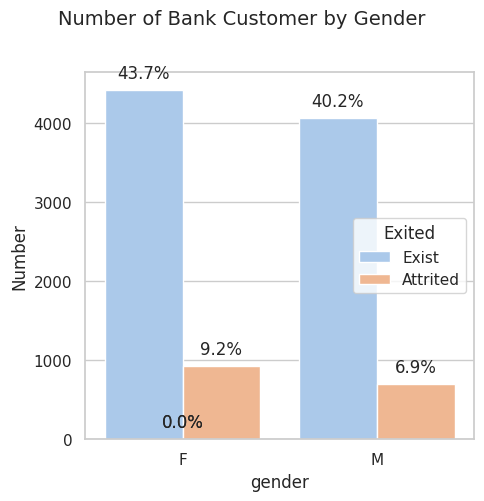

In [48]:
# initialize chart title
chart = 'Number of Bank Customer by Gender'

# apply the procedure to plot the chart
countplot_univariate(df, 'gender', 'churn', 'gender', 0, 0, None, 5, 5, 1,
                     'vertical', chart)

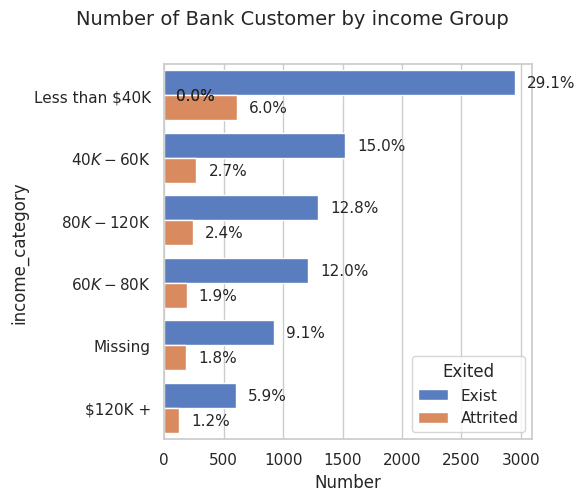

In [49]:
# initialize chart title
chart = 'Number of Bank Customer by income Group'

# apply the procedure to plot the chart
countplot_univariate(df, 'income_category', 'churn', 'income_category', 0, 0, None, 6, 5, 1,
                     'horizontal', chart)

Bank customers in the Less then 40k income group have a higher churn percentage than other age groups at 6.0%..

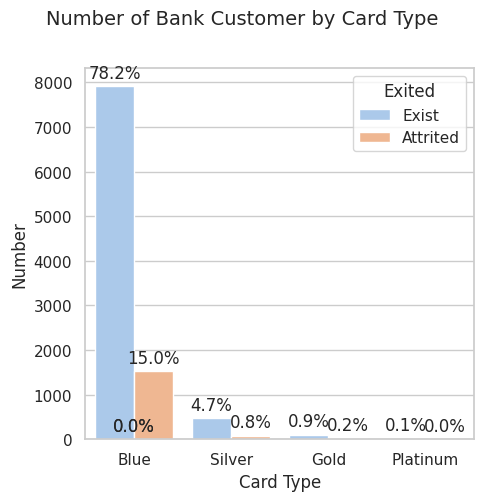

In [50]:
# initialize chart title
chart = 'Number of Bank Customer by Card Type'

# apply the procedure to plot the chart
countplot_univariate(df, 'card_category', 'churn', 'Card Type', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

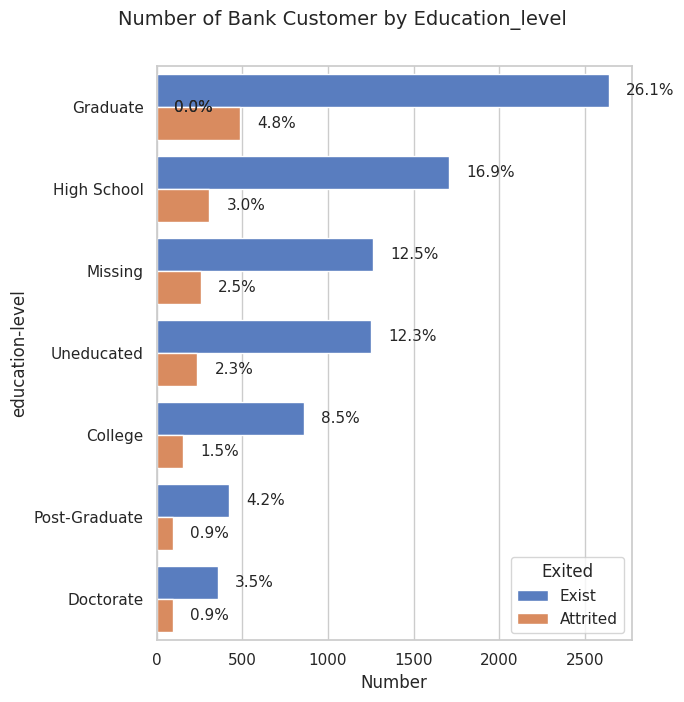

In [51]:
# initialize chart title
chart = 'Number of Bank Customer by Education_level'

# apply the procedure to plot the chart
countplot_univariate(df, 'education_level', 'churn', 'education-level', 0, 0, None, 7, 7, 1, \
                     'horizontal', chart)

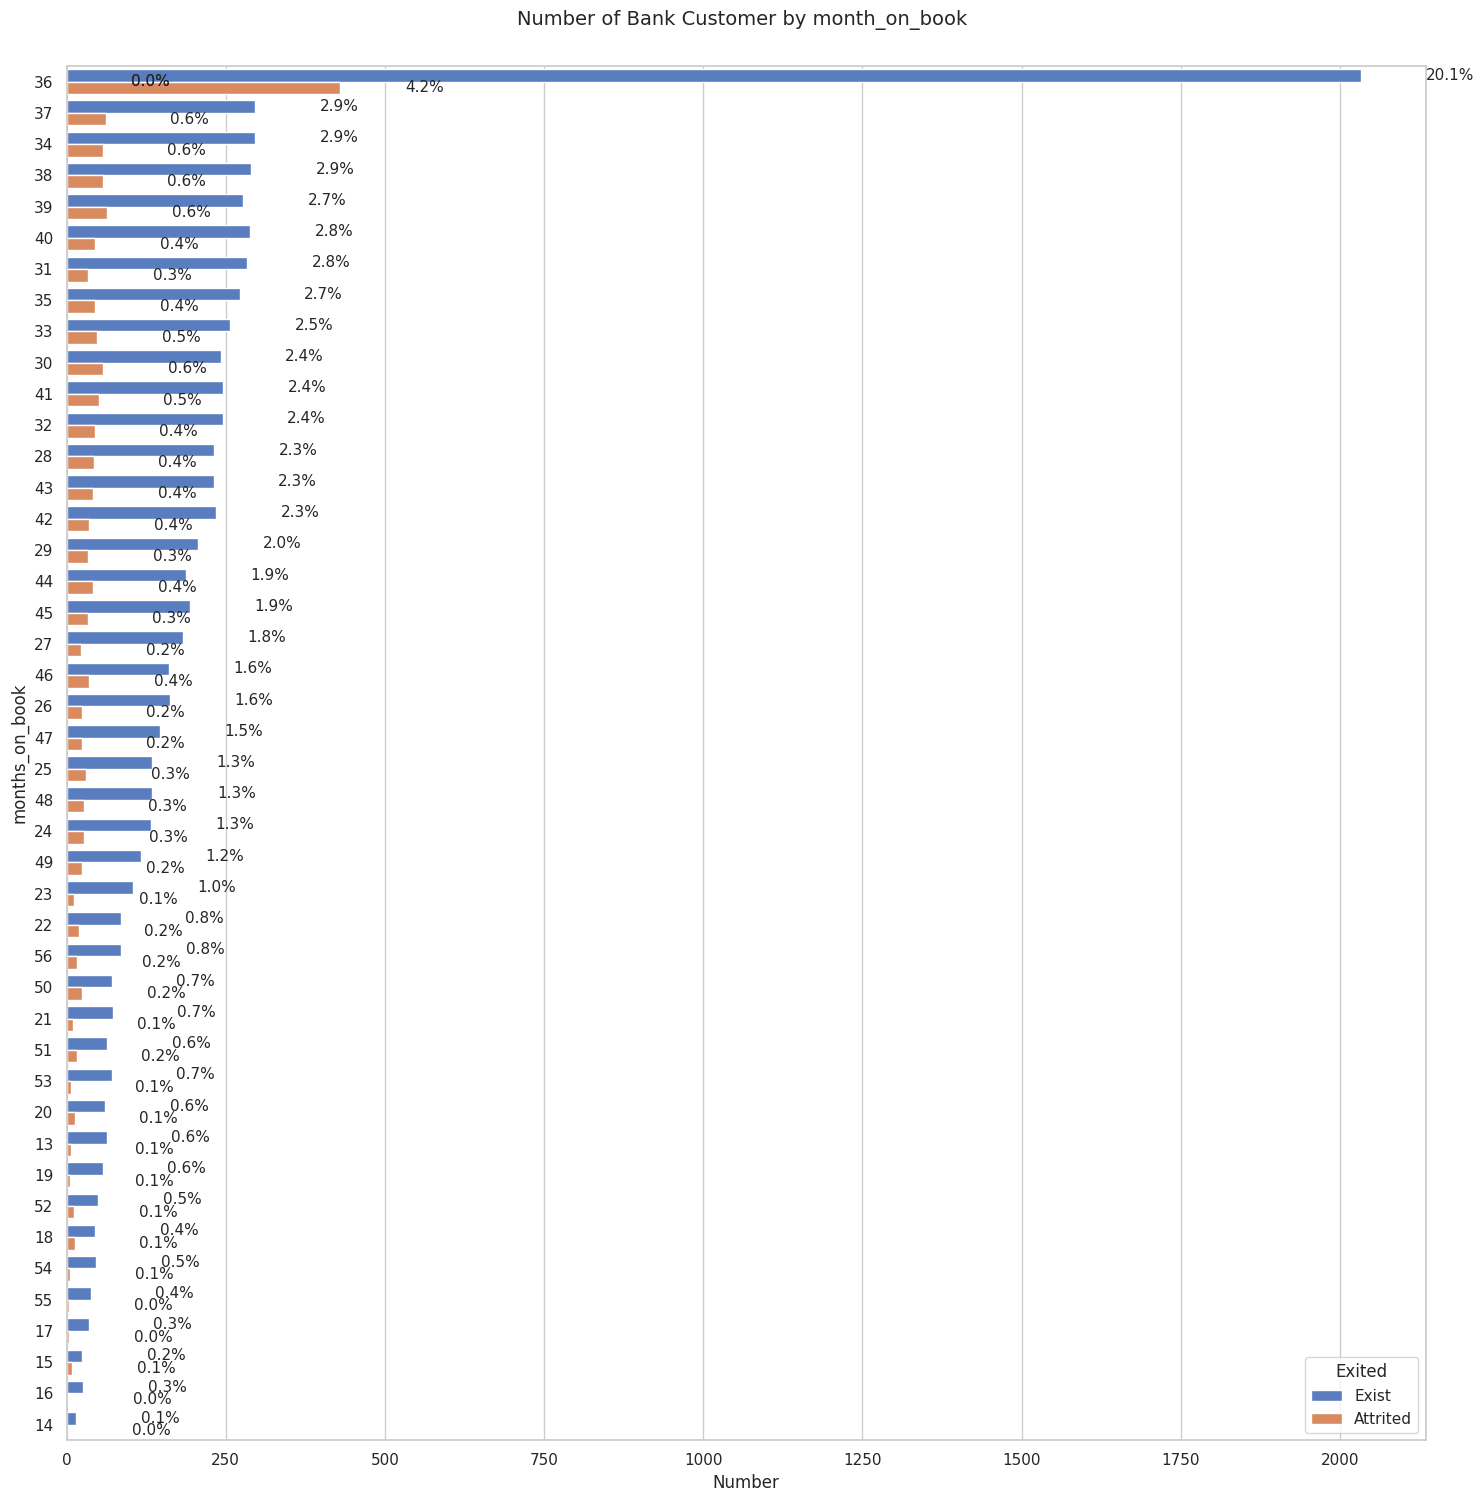

In [52]:
# initialize chart title
chart = 'Number of Bank Customer by month_on_book'

# apply the procedure to plot the chart
countplot_univariate(df, 'months_on_book', 'churn', 'months_on_book', 0, 0, None, 15, 15, 1, \
                     'horizontal', chart)

In [53]:

df[df.churn == 1].describe(include='category')

,gender,education_level,marital_status,income_category,card_category
count,1627,1627,1627,1627,1627
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,930,487,709,612,1519


In [54]:

df[df.churn == 0].describe(include='category')

,gender,education_level,marital_status,income_category,card_category
count,8500,8500,8500,8500,8500
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,4428,2641,3978,2949,7917


In [55]:
df.drop(columns=['avg_open_to_buy','months_on_book'],inplace=True)

# **Outlier** Detection and Capping

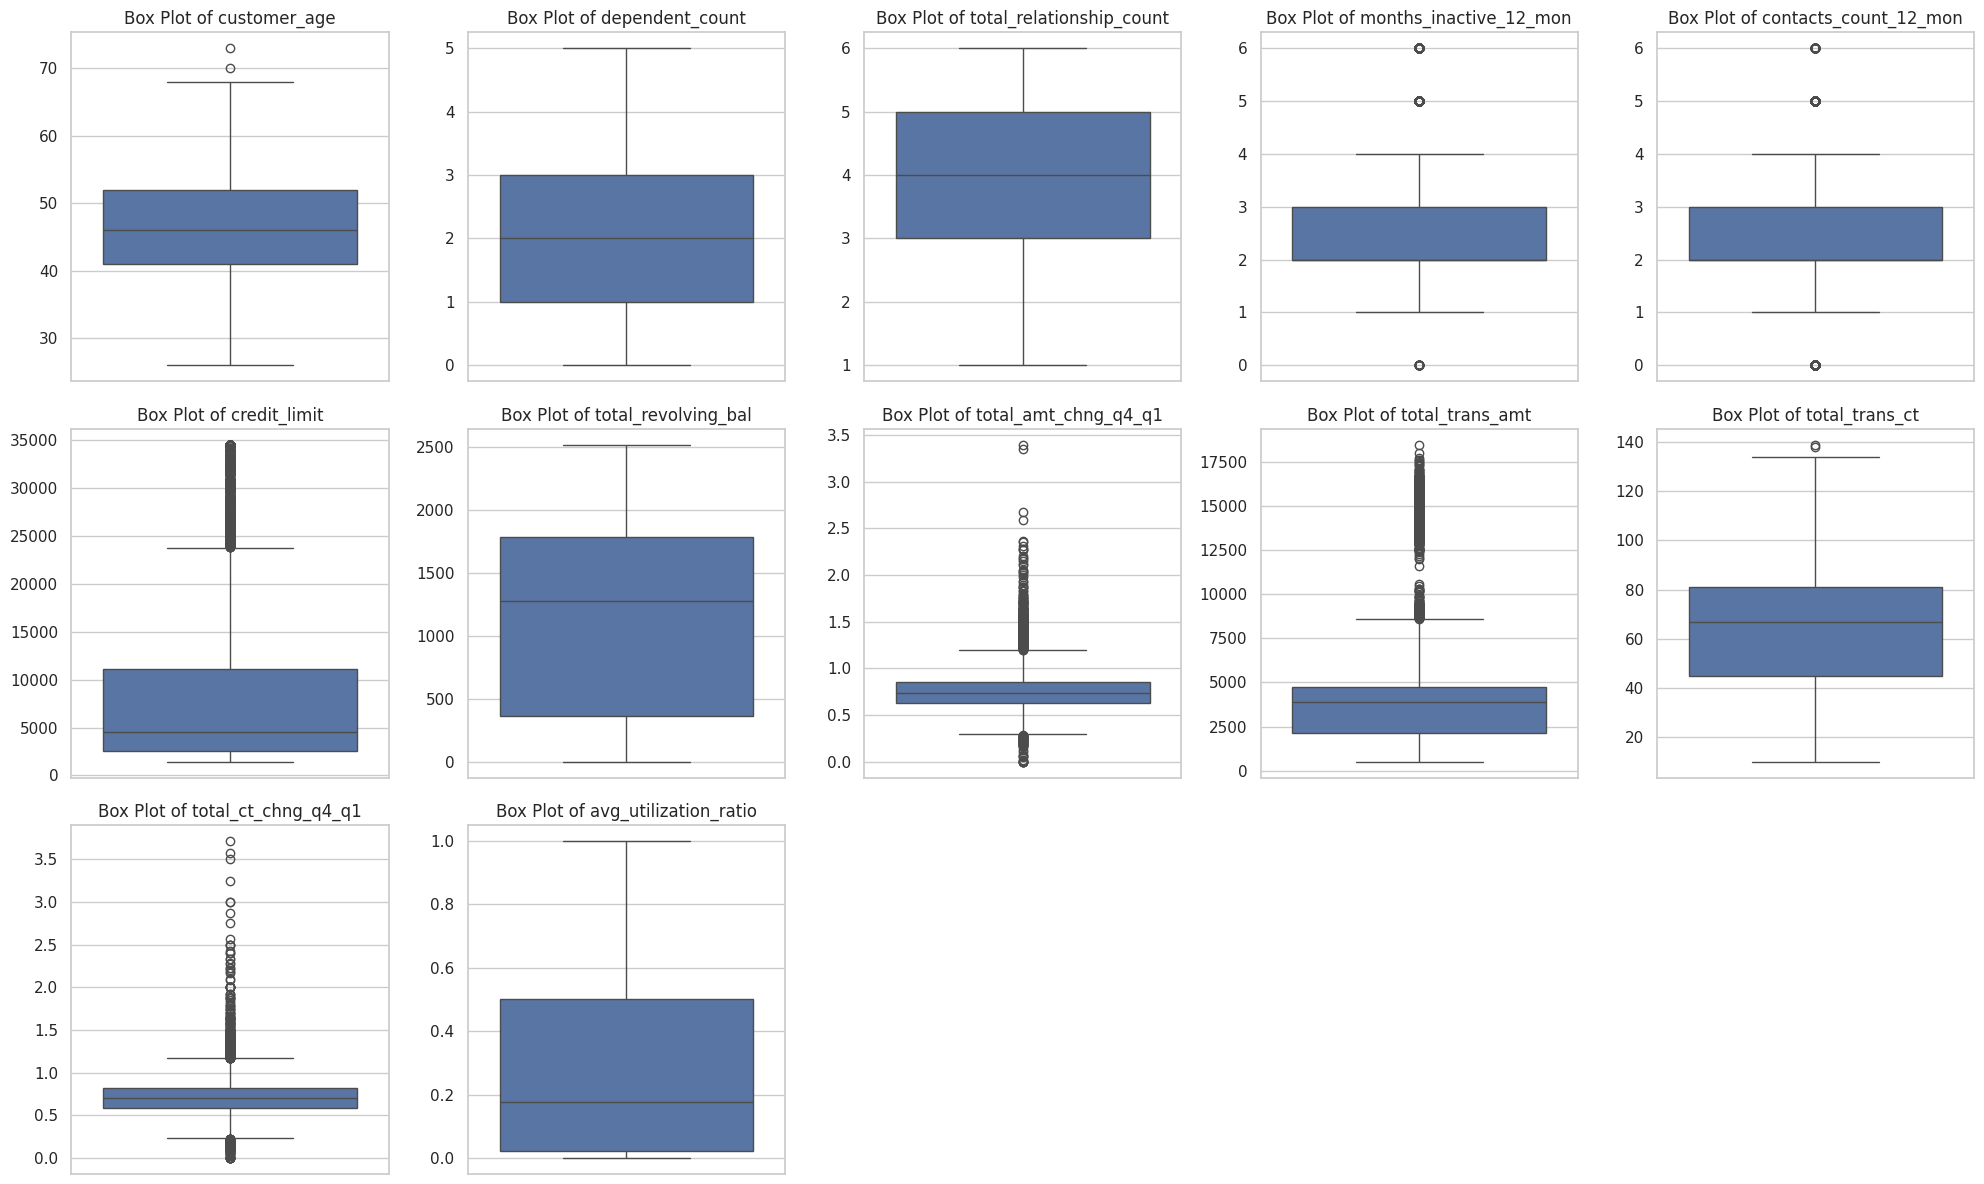

In [56]:
# --- Outlier Detection using Box Plots ---

# Separate features (X) from the target variable (y)
X = df.drop(columns=['churn'])
y = df['churn']

# Identify all numerical columns in the feature set
numeric_columns = X.select_dtypes(include=np.number).columns

# Define the grid layout for the plots (e.g., 5 columns per row)
n_cols = 5
n_rows = (len(numeric_columns) - 1) // n_cols + 1

# Create the figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes to easily loop through it

# Loop through each numerical column and create a box plot
for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=X, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}', fontsize=12)
    axes[i].set_ylabel('') # Remove y-label for cleaner look

# Hide any unused subplots in the grid
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [57]:
# --- Outlier Detection and Capping using the IQR Method ---

print("Percentage of outliers in each numerical column:")

# Loop through all columns with numerical data types
for column in X.select_dtypes(include=np.number).columns:

    # 1. Calculate IQR and define outlier boundaries
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 2. Identify and count outliers
    outliers = X[(X[column] < lower_bound) | (X[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(X)) * 100

    # Print the result
    print(f"- {column}: {outlier_percentage:.2f}%")

    # 3. Cap the outliers
    X[column] = X[column].clip(lower=lower_bound, upper=upper_bound)

Percentage of outliers in each numerical column:
- customer_age: 0.02%
- dependent_count: 0.00%
- total_relationship_count: 0.00%
- months_inactive_12_mon: 3.27%
- contacts_count_12_mon: 6.21%
- credit_limit: 9.72%
- total_revolving_bal: 0.00%
- total_amt_chng_q4_q1: 3.91%
- total_trans_amt: 8.85%
- total_trans_ct: 0.02%
- total_ct_chng_q4_q1: 3.89%
- avg_utilization_ratio: 0.00%


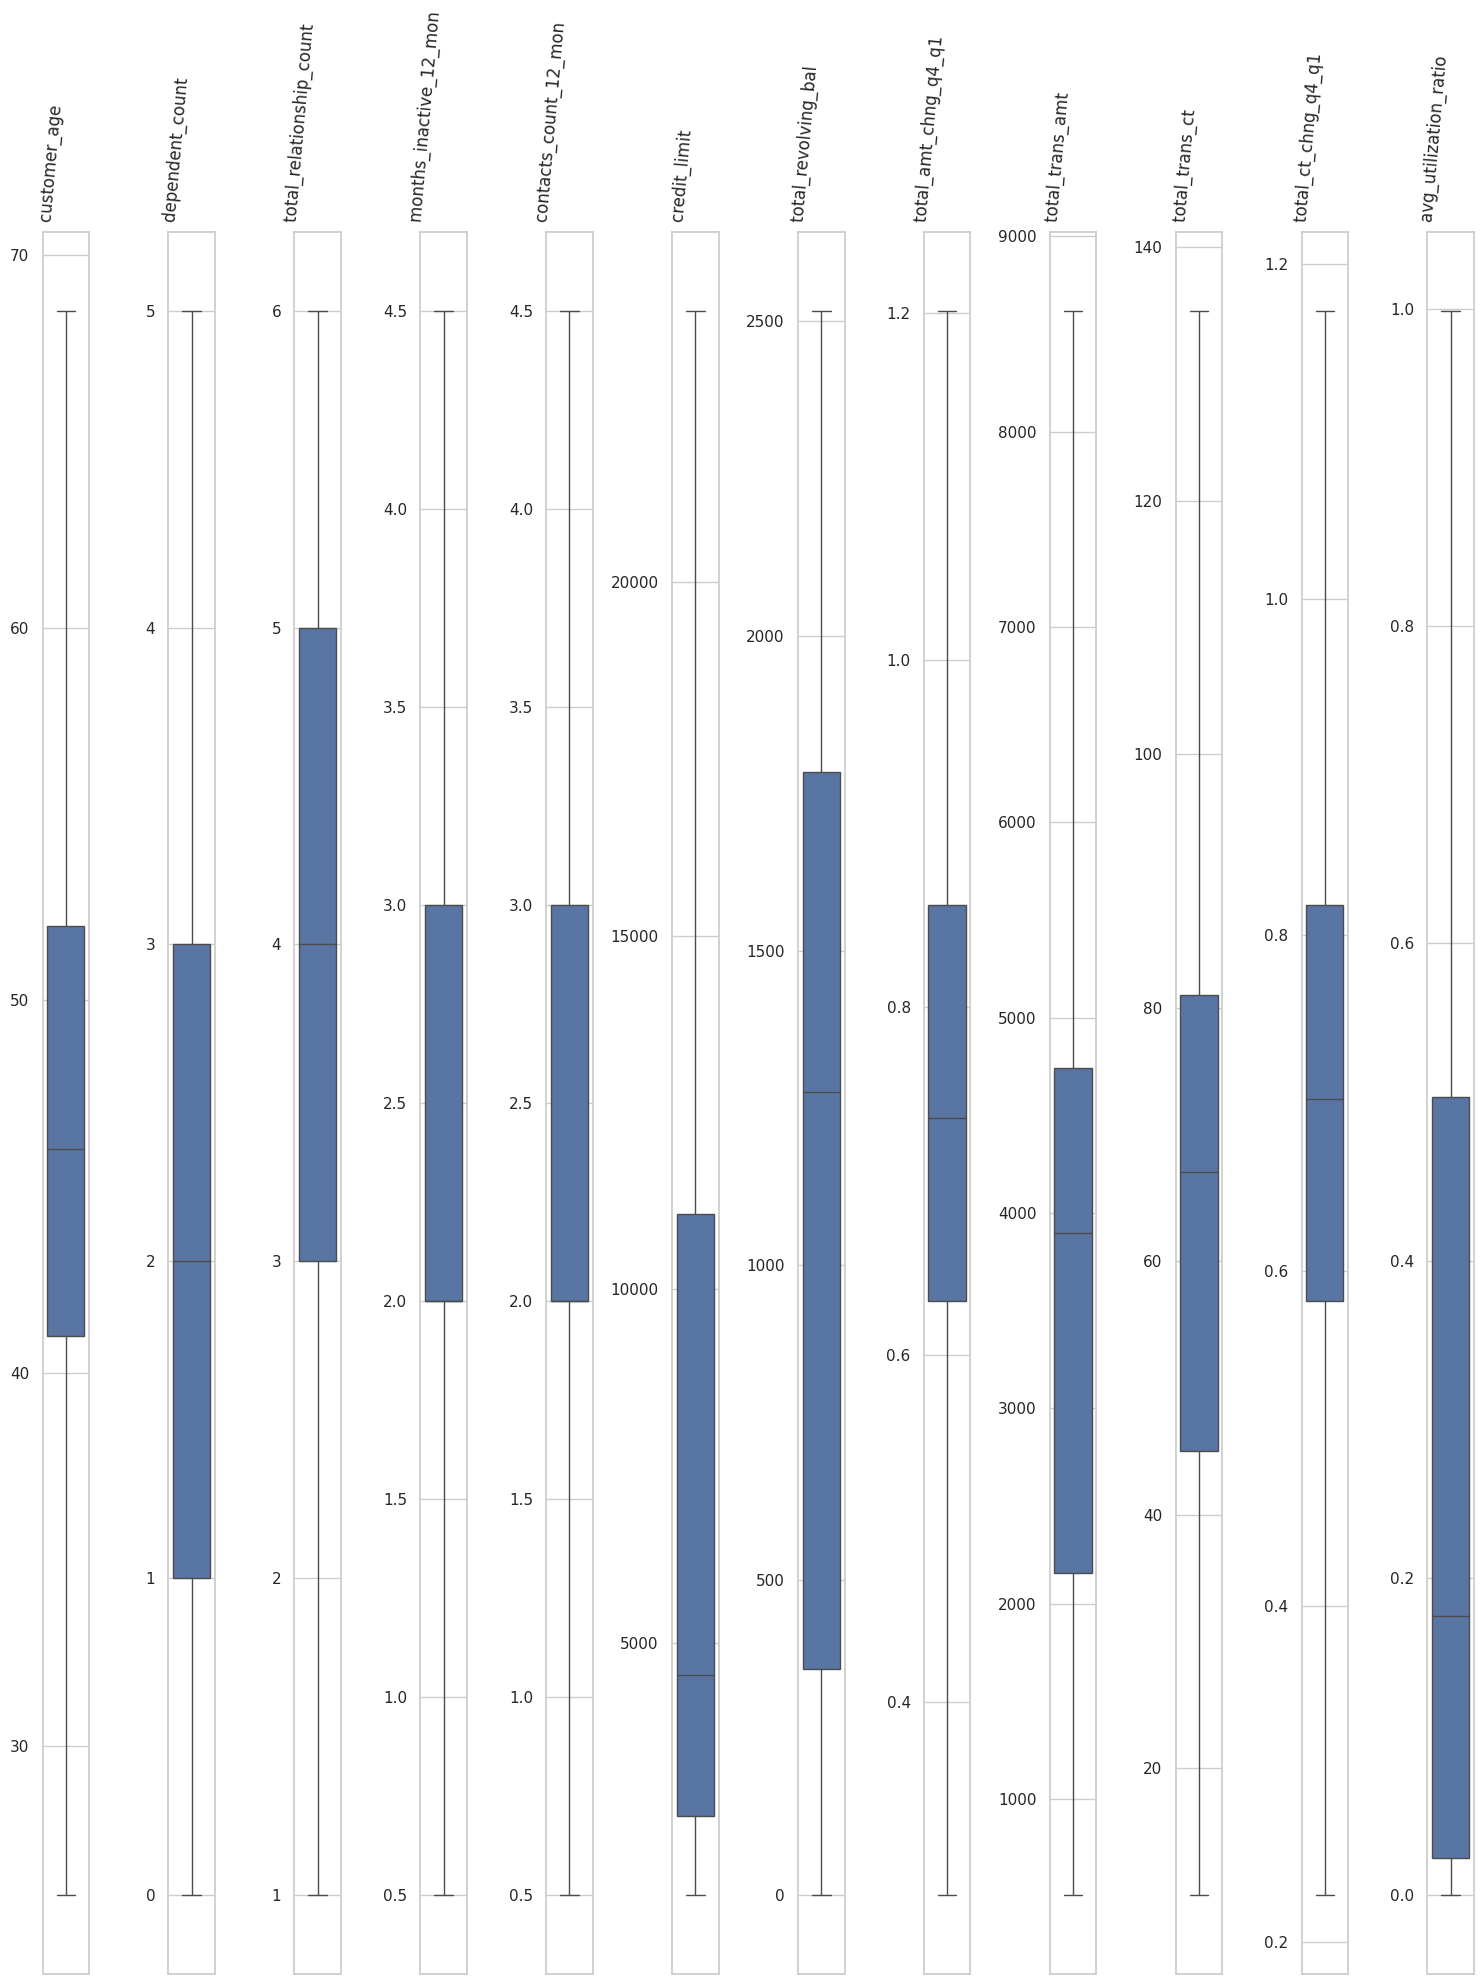

In [58]:
plt.figure(figsize=(15, 20))

# Plot each numeric column in the DataFrame as a separate subplot
for i, column in enumerate(numeric_columns, 1):
    ax=plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(y=X[column])
    plt.title(f' {column}')
    plt.setp(ax.title, rotation=85, ha="right")  # Rotate the title
    plt.ylabel('')  # Remove y-axis label to avoid clutter

# Adjust layout
plt.tight_layout()
plt.show()

In [59]:
X.shape

(10127, 17)

**MODELS**

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import  roc_auc_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance

from sklearn.base import TransformerMixin, BaseEstimator
#from sklearn.metrics import plot_roc_curve
import time
from sklearn.metrics import  make_scorer

In [61]:
X_train_,X_test_,y_train,y_test=train_test_split(X,y,test_size=0.2

,random_state=42)

In [62]:
print(X_train_.shape)
print(X_test_.shape)
print(y_train.shape)
print(y_test.shape)

(8101, 17)
(2026, 17)
(8101,)
(2026,)


**Base line model**

In [63]:
dummy_clf = DummyClassifier(strategy='prior')
dummy_clf.fit(X_train_, y_train)
y_pred = dummy_clf.predict(X_test_)

accuracy_score(y_test, y_pred)

0.8385982230997039

**Construct preprocessing Pipeline**

Numerical features Include an imputation step for numerical features, even though there are no NaN values in this dataset, it is a good practice in-case the training is re-run on data with NaN values. Use a "median" imputation strategy as this is a good baseline, not too skewed by outliers.

Categorical features Use onehot encoding for categorical features. Will probably try ordinal encoder on some features, as they have a certain "order" to them (like income values).

In [64]:
# Numerical preprocessor
num_features = X_train_.select_dtypes(include=['int','float']).columns.tolist()
num_transformer = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                            ('scaler', StandardScaler())])

# Ordinal features
ord_features = ['education_level']

ord_transformer =Pipeline([('encoding',OrdinalEncoder(categories=[['Missing','Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']]))])

# Categorical preprocessor
cat_features = ['gender', 'marital_status', 'income_category', 'card_category']
cat_transformer = Pipeline([('encode',OneHotEncoder( handle_unknown='ignore'))])

# Combined preprocessor
preprocessor = ColumnTransformer([('ords', ord_transformer, ord_features),
                                  ('cats', cat_transformer, cat_features),
                                  ('nums', num_transformer, num_features)],
                                 remainder='drop')

In [69]:
X_train=preprocessor.fit_transform(X_train_)
X_test=preprocessor.transform(X_test_)
print(X_train.shape)
print(X_test.shape)

(8101, 29)
(2026, 29)


**MODEL EVALUATION FUNCTION**

In [74]:
import time
from joblib import parallel_backend  # <-- ADD THIS IMPORT
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report, roc_auc_score,
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt

def evaluate_model(model, model_name: str, X_train, y_train, X_test, y_test, param_grid: dict):
    """
    Trains, evaluates, and tunes a given classifier.
    """
    print(f"--- Evaluating Model: {model_name} ---")

    # 1. Train the initial model and time it
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # 2. Generate predictions
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # 3. Visualize performance
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Performance Metrics for {model_name}', fontsize=16)

    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=axes[0])
    axes[0].set_title('Precision-Recall Curve')

    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes[1])
    axes[1].set_title('ROC Curve')

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=axes[2], cmap='Blues')
    axes[2].set_title('Confusion Matrix')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # 4. Print initial metrics
    print(f"Initial Training Time: {training_time:.2f} seconds")
    print(f"Initial ROC-AUC Score: {roc_auc_score(y_test, y_proba_test):.4f}")
    print("\nInitial Classification Report (on Test Set):\n", classification_report(y_test, y_pred_test))

    # 5. Hyperparameter Tuning with GridSearchCV
    print("\n--- Starting GridSearchCV for Hyperparameter Tuning ---")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

    # Use 'threading' to avoid memory duplication with large datasets
    with parallel_backend('threading'):
        grid_search.fit(X_train, y_train)

    print("\nBest Hyperparameters Found:\n", grid_search.best_params_)
    print(f"Best ROC-AUC Score (from CV): {grid_search.best_score_:.4f}")

    # 6. Evaluate the best model from the grid search
    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test)

    print("\nFinal Classification Report (with Best Hyperparameters):\n", classification_report(y_test, y_pred_best))
    print("-" * 60)

**SMOTE**

In [75]:
from imblearn.over_sampling import SMOTE
import pandas as pd

def train_and_evaluate_with_smote(classifier, X_train, y_train, X_test, y_test):
    """
    Trains a classifier on SMOTE-balanced data and evaluates its performance.

    Args:
        classifier: The scikit-learn classifier instance.
        X_train, y_train: The original, imbalanced training data.
        X_test, y_test: The original test data.
    """
    print(f"--- Evaluating {type(classifier).__name__} with SMOTE ---")

    # 1. Apply SMOTE to the training data
    print("Class distribution before SMOTE:\n", pd.Series(y_train).value_counts())
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("\nClass distribution after SMOTE:\n", pd.Series(y_train_resampled).value_counts())

    # 2. Train the classifier on the new, balanced data
    classifier.fit(X_train_resampled, y_train_resampled)

    # 3. Make predictions on the original, imbalanced test set
    y_pred = classifier.predict(X_test)
    y_proba = classifier.predict_proba(X_test)[:, 1]

    # 4. Visualize performance
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Performance of {type(classifier).__name__} with SMOTE', fontsize=16)

    PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, ax=axes[0])
    axes[0].set_title('Precision-Recall Curve')

    RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=axes[1])
    axes[1].set_title('ROC Curve')

    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=axes[2], cmap='Blues')
    axes[2].set_title('Confusion Matrix')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # 5. Report metrics
    print(f"ROC-AUC Score (with SMOTE): {roc_auc_score(y_test, y_proba):.4f}")
    print("\nClassification Report (with SMOTE):\n", classification_report(y_test, y_pred))
    print("-" * 60)

**MDOEL TRAINING**

**1. LOGISTIC REGRESSION**

--- Evaluating Model: Logistic Regression ---


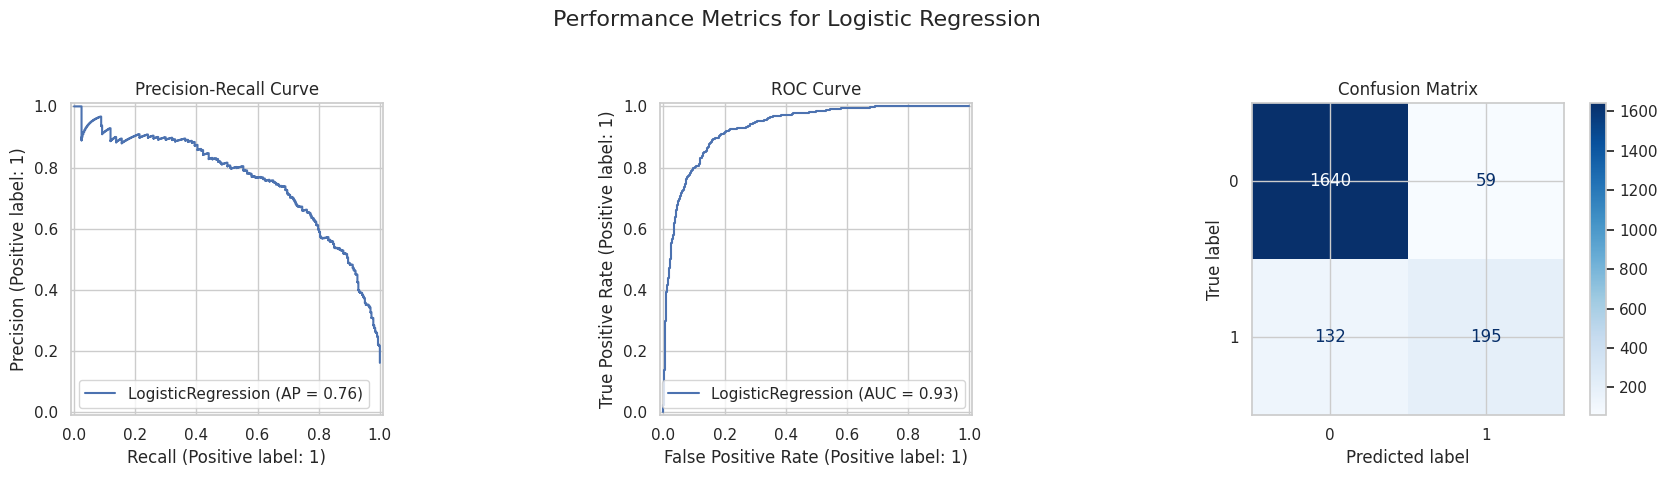

Initial Training Time: 0.16 seconds
Initial ROC-AUC Score: 0.9340

Initial Classification Report (on Test Set):
               precision    recall  f1-score   support

           0       0.93      0.97      0.94      1699
           1       0.77      0.60      0.67       327

    accuracy                           0.91      2026
   macro avg       0.85      0.78      0.81      2026
weighted avg       0.90      0.91      0.90      2026


--- Starting GridSearchCV for Hyperparameter Tuning ---

Best Hyperparameters Found:
 {'C': 1.0, 'l1_ratio': 0.75, 'penalty': 'elasticnet', 'solver': 'saga'}
Best ROC-AUC Score (from CV): 0.9390

Final Classification Report (with Best Hyperparameters):
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1699
           1       0.77      0.60      0.67       327

    accuracy                           0.91      2026
   macro avg       0.85      0.78      0.81      2026
weighted avg       0.90      0.91

In [76]:
# --- 1. Define the Model and Hyperparameter Grid ---

# Create a Logistic Regression model instance
# max_iter is set to a higher value to ensure the solver converges.
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Define the grid of hyperparameters to search over
# We are testing the 'elasticnet' penalty which is a combination of L1 and L2.
param_grid_lr = {
    'solver': ['saga'],
    'penalty': ['elasticnet'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'C': [0.01, 0.1, 1.0]
}


# --- 2. Evaluate the Model ---

# Use the comprehensive evaluation function to train, test, and tune the model
evaluate_model(
    model=logreg_model,
    model_name="Logistic Regression",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_grid=param_grid_lr
)

--- Evaluating LogisticRegression with SMOTE ---
Class distribution before SMOTE:
 churn
0    6801
1    1300
Name: count, dtype: int64

Class distribution after SMOTE:
 churn
0    6801
1    6801
Name: count, dtype: int64


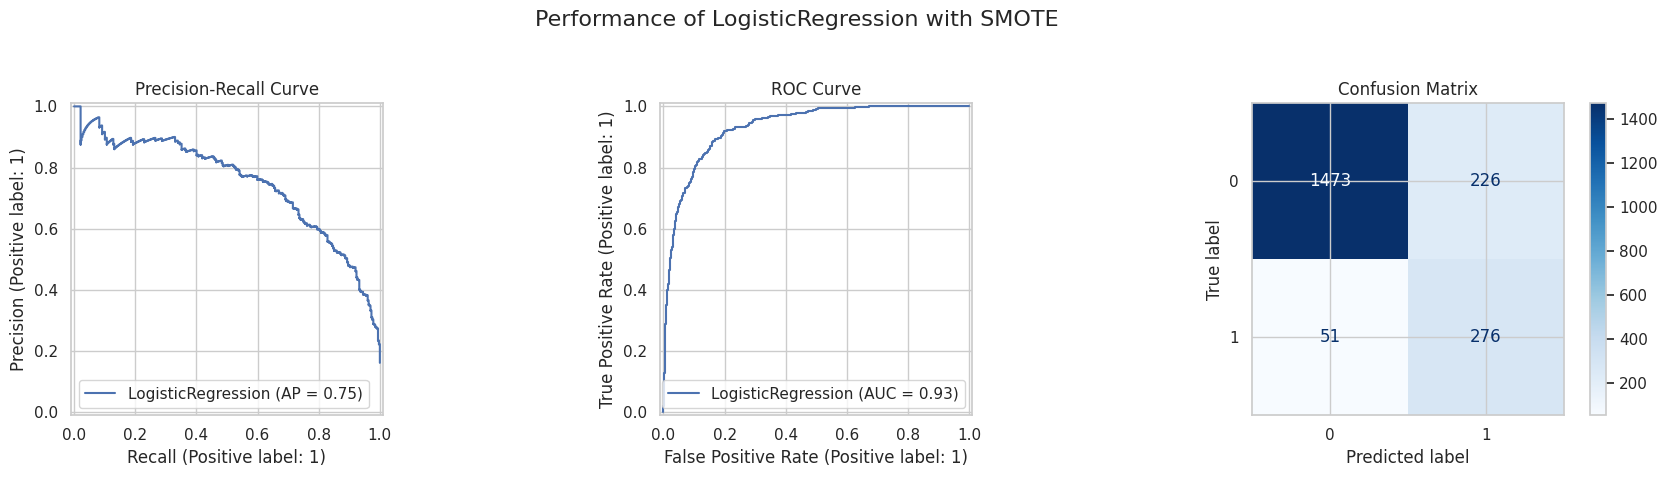

ROC-AUC Score (with SMOTE): 0.9335

Classification Report (with SMOTE):
               precision    recall  f1-score   support

           0       0.97      0.87      0.91      1699
           1       0.55      0.84      0.67       327

    accuracy                           0.86      2026
   macro avg       0.76      0.86      0.79      2026
weighted avg       0.90      0.86      0.87      2026

------------------------------------------------------------


In [78]:
# Evaluate the Logistic Regression model using the SMOTE-balanced training data
train_and_evaluate_with_smote(
    classifier=LogisticRegression(max_iter=1000, random_state=42),
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

**2. Decision Tree Classifier**

--- Evaluating Model: Decision Tree ---


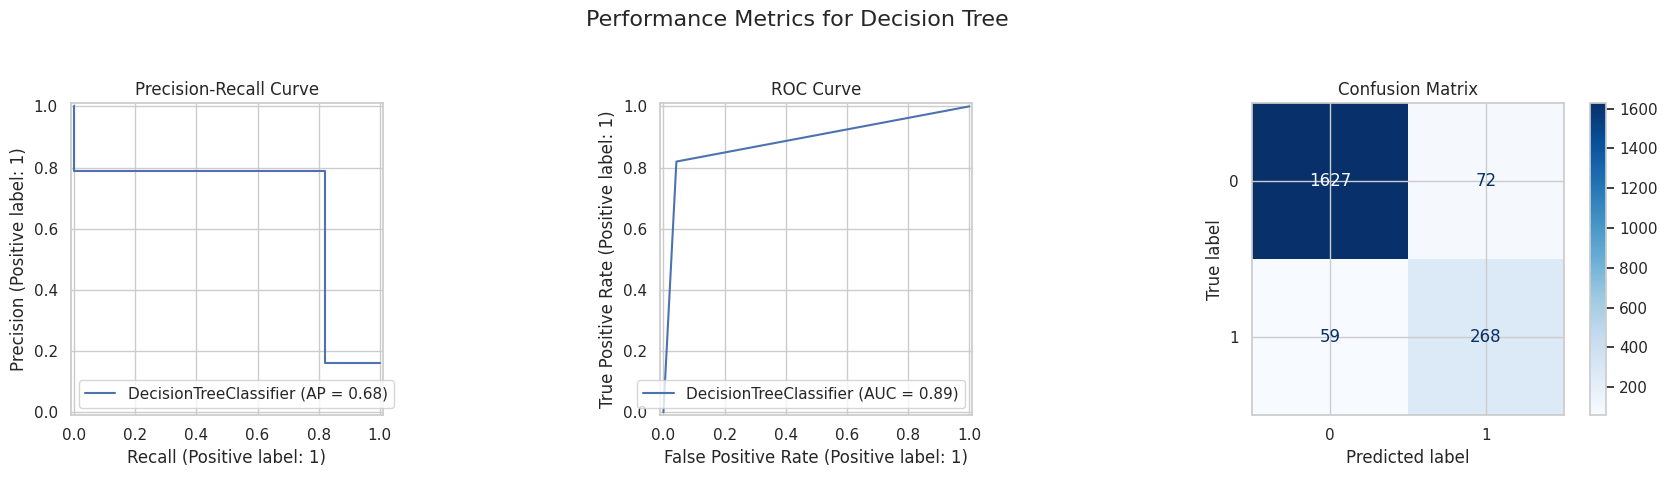

Initial Training Time: 0.12 seconds
Initial ROC-AUC Score: 0.8886

Initial Classification Report (on Test Set):
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1699
           1       0.79      0.82      0.80       327

    accuracy                           0.94      2026
   macro avg       0.88      0.89      0.88      2026
weighted avg       0.94      0.94      0.94      2026


--- Starting GridSearchCV for Hyperparameter Tuning ---

Best Hyperparameters Found:
 {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best ROC-AUC Score (from CV): 0.9578

Final Classification Report (with Best Hyperparameters):
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1699
           1       0.76      0.83      0.79       327

    accuracy                           0.93      2026
   macro avg       0.86      0.89      0.87      2026
weighted avg     

In [79]:
# --- 1. Define the Model and Hyperparameter Grid ---

# Create a Decision Tree model instance
dt_model = DecisionTreeClassifier(random_state=42)

# Define the grid of hyperparameters to search over
# These parameters control the tree's structure and help prevent overfitting.
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# --- 2. Evaluate the Model ---

# Use the comprehensive evaluation function to train, test, and tune the model
evaluate_model(
    model=dt_model,
    model_name="Decision Tree",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_grid=param_grid_dt
)

--- Evaluating DecisionTreeClassifier with SMOTE ---
Class distribution before SMOTE:
 churn
0    6801
1    1300
Name: count, dtype: int64

Class distribution after SMOTE:
 churn
0    6801
1    6801
Name: count, dtype: int64


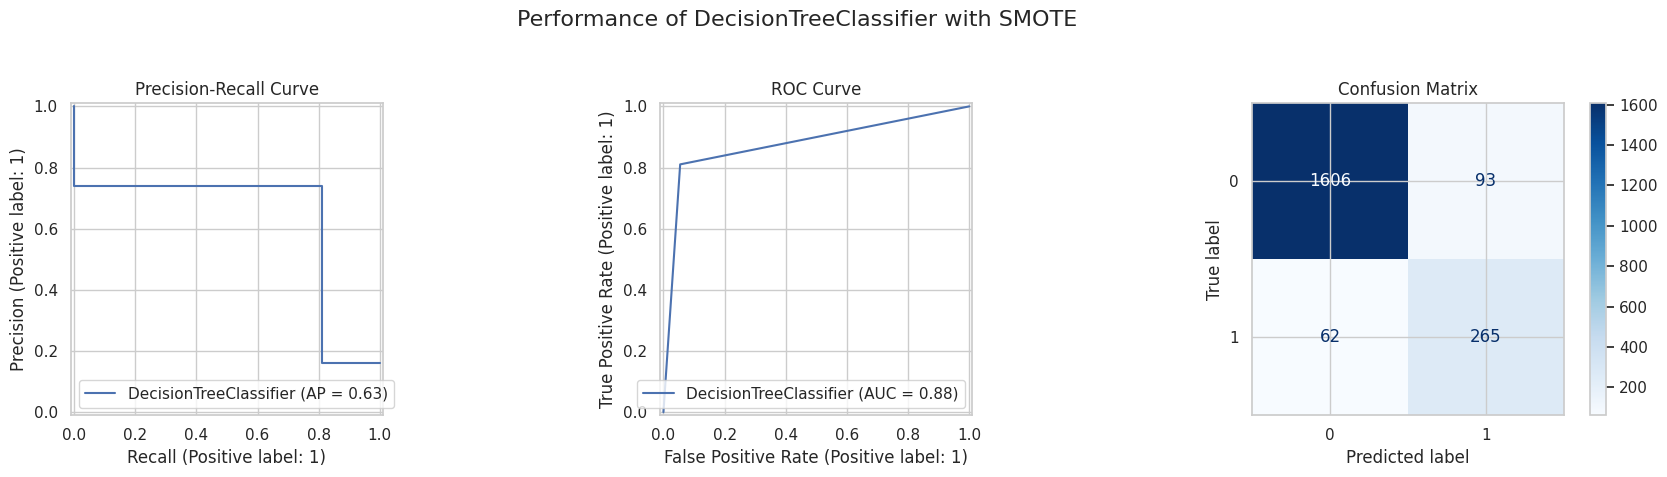

ROC-AUC Score (with SMOTE): 0.8778

Classification Report (with SMOTE):
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1699
           1       0.74      0.81      0.77       327

    accuracy                           0.92      2026
   macro avg       0.85      0.88      0.86      2026
weighted avg       0.93      0.92      0.92      2026

------------------------------------------------------------


In [80]:
# Evaluate the Decision Tree model using the SMOTE-balanced training data
train_and_evaluate_with_smote(
    classifier=DecisionTreeClassifier(random_state=42),
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

**3. VOTING ENSEMBLE**

In [81]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# --- 1. Define the Base Models for the Ensemble ---


# Here we use a tuned Decision Tree, a Random Forest, and an XGBoost model.
clf1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=9, min_samples_split=2, random_state=42)
clf3 = RandomForestClassifier(random_state=42)

# --- 2. Create the Voting Ensemble ---

voting_clf = VotingClassifier(
    estimators=[
        ('xgb', clf1),
        ('dt', clf2),
        ('rf', clf3)
    ],
    voting='soft'
)

# --- 3. Train and Evaluate the Ensemble ---

# Train the entire ensemble on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_voting = voting_clf.predict(X_test)

# Print the final performance report
print("--- Voting Classifier Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))

--- Voting Classifier Performance ---
Accuracy: 0.9605

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1699
           1       0.90      0.85      0.87       327

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026



--- Evaluating VotingClassifier with SMOTE ---
Class distribution before SMOTE:
 churn
0    6801
1    1300
Name: count, dtype: int64

Class distribution after SMOTE:
 churn
0    6801
1    6801
Name: count, dtype: int64


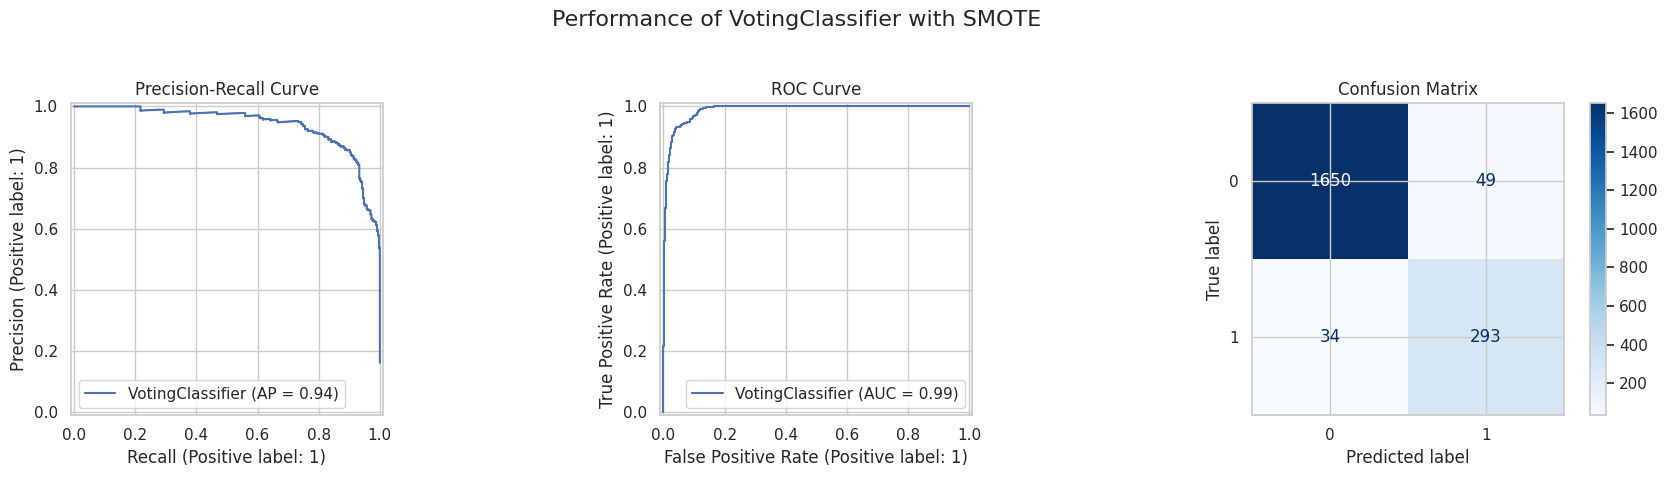

ROC-AUC Score (with SMOTE): 0.9878

Classification Report (with SMOTE):
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1699
           1       0.86      0.90      0.88       327

    accuracy                           0.96      2026
   macro avg       0.92      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026

------------------------------------------------------------


In [83]:
# Evaluate the Voting Classifier ensemble using the SMOTE-balanced training data
# This combines our most advanced model with our data-balancing technique.
train_and_evaluate_with_smote(
    classifier=VotingClassifier(
        estimators=[('xgb', clf1), ('dt', clf2), ('rf', clf3)],
        voting='soft'
    ),
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

**4. RANDOM FOREST**

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- 1. Create and Train the RandomForest Model ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# --- 2. Make Predictions ---
y_pred_rf = rf_model.predict(X_test)

# --- 3. Evaluate the Model's Performance ---
print("--- Random Forest Classifier Performance ---")
print(f"Accuracy on Test Data: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

--- Random Forest Classifier Performance ---
Accuracy on Test Data: 0.9511

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1699
           1       0.92      0.76      0.83       327

    accuracy                           0.95      2026
   macro avg       0.94      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026



--- Evaluating RandomForestClassifier with SMOTE ---
Class distribution before SMOTE:
 churn
0    6801
1    1300
Name: count, dtype: int64

Class distribution after SMOTE:
 churn
0    6801
1    6801
Name: count, dtype: int64


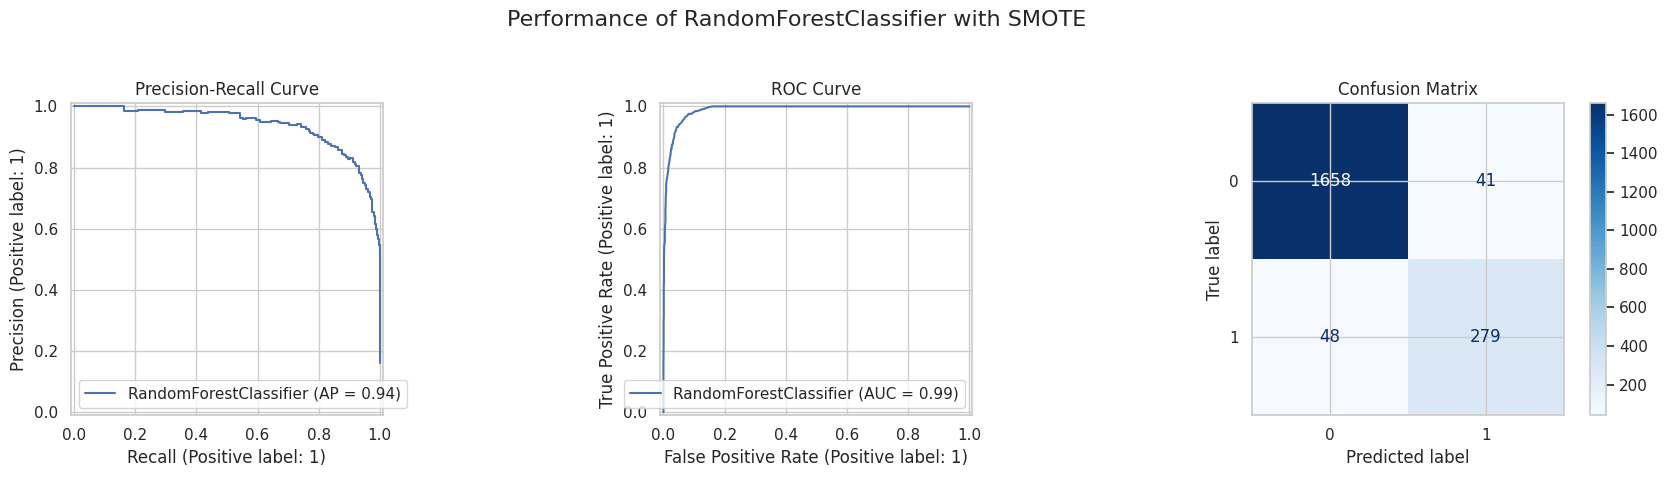

ROC-AUC Score (with SMOTE): 0.9882

Classification Report (with SMOTE):
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1699
           1       0.87      0.85      0.86       327

    accuracy                           0.96      2026
   macro avg       0.92      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026

------------------------------------------------------------


In [85]:
# Evaluate the Random Forest model using the SMOTE-balanced training data
train_and_evaluate_with_smote(
    classifier=RandomForestClassifier(random_state=42),
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

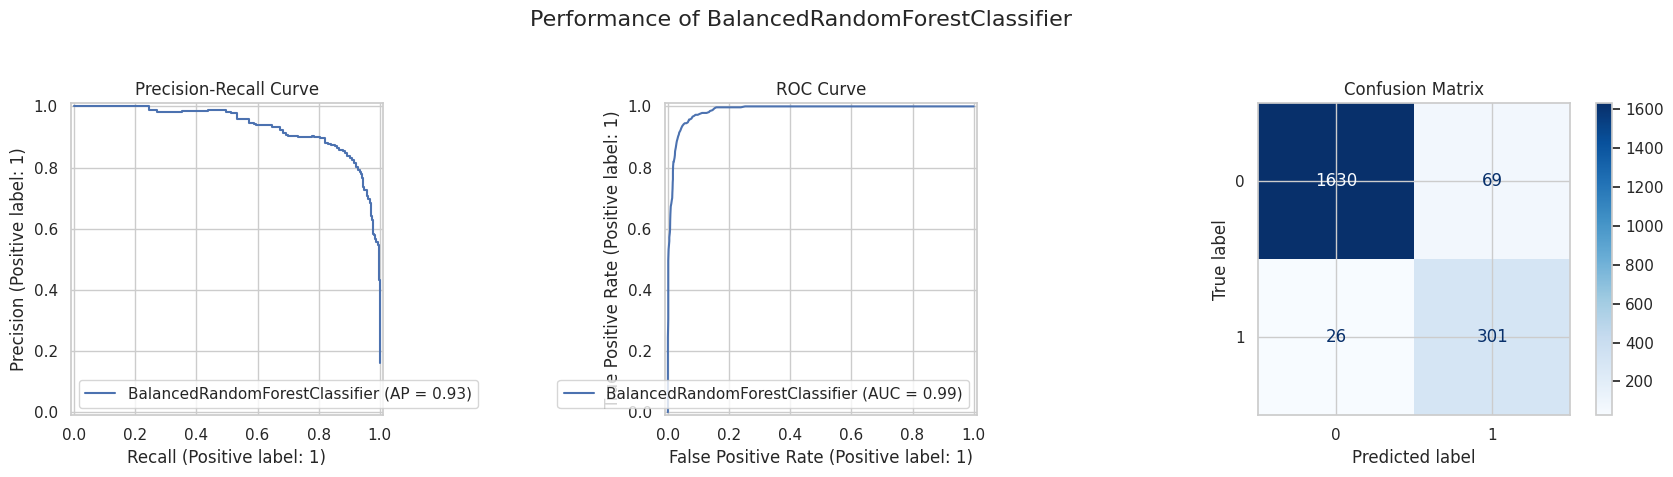

--- BalancedRandomForestClassifier Performance ---
ROC-AUC Score: 0.9865
Accuracy on Test Data: 0.9531

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1699
           1       0.81      0.92      0.86       327

    accuracy                           0.95      2026
   macro avg       0.90      0.94      0.92      2026
weighted avg       0.96      0.95      0.95      2026



In [86]:
#balanced random forest
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# --- 1. Create and Train the BalancedRandomForest Model ---

# This classifier automatically balances the data during training by under-sampling
# the majority class for each tree that is built.
brf_model = BalancedRandomForestClassifier(random_state=42)
brf_model.fit(X_train, y_train)

# --- 2. Make Predictions ---
y_pred_brf = brf_model.predict(X_test)
y_proba_brf = brf_model.predict_proba(X_test)[:, 1]

# --- 3. Visualize Performance ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Performance of BalancedRandomForestClassifier', fontsize=16)

PrecisionRecallDisplay.from_estimator(brf_model, X_test, y_test, ax=axes[0])
axes[0].set_title('Precision-Recall Curve')

RocCurveDisplay.from_estimator(brf_model, X_test, y_test, ax=axes[1])
axes[1].set_title('ROC Curve')

ConfusionMatrixDisplay.from_estimator(brf_model, X_test, y_test, ax=axes[2], cmap='Blues')
axes[2].set_title('Confusion Matrix')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 4. Report Metrics ---
print("--- BalancedRandomForestClassifier Performance ---")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_brf):.4f}")
print(f"Accuracy on Test Data: {accuracy_score(y_test, y_pred_brf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_brf))

**5. XGBOOST CLASSIFIER**

--- Evaluating Model: XGBoost Classifier ---


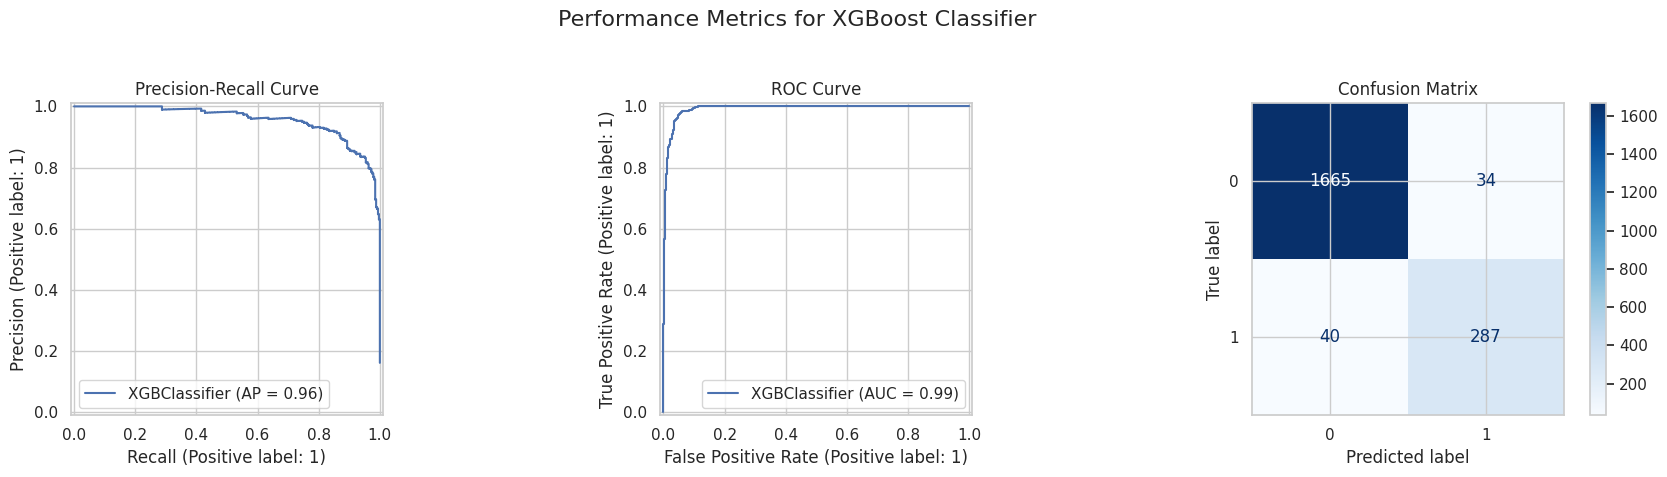

Initial Training Time: 2.47 seconds
Initial ROC-AUC Score: 0.9918

Initial Classification Report (on Test Set):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.89      0.88      0.89       327

    accuracy                           0.96      2026
   macro avg       0.94      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026


--- Starting GridSearchCV for Hyperparameter Tuning ---

Best Hyperparameters Found:
 {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Best ROC-AUC Score (from CV): 0.9939

Final Classification Report (with Best Hyperparameters):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.91      0.89      0.90       327

    accuracy                           0.97      2026
   macro avg       0.94      0.93      0.94      2026
weighted avg       0.97      0.97      0.97  

In [87]:
from xgboost import XGBClassifier

# --- 1. Define the Model and Hyperparameter Grid ---

# Create an XGBoost model instance
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the grid of hyperparameters to search over
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# --- 2. Evaluate the Model ---

# Use the comprehensive evaluation function to train, test, and tune the model
evaluate_model(
    model=xgb_model,
    model_name="XGBoost Classifier",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_grid=param_grid_xgb
)

--- Evaluating XGBClassifier with SMOTE ---
Class distribution before SMOTE:
 churn
0    6801
1    1300
Name: count, dtype: int64

Class distribution after SMOTE:
 churn
0    6801
1    6801
Name: count, dtype: int64


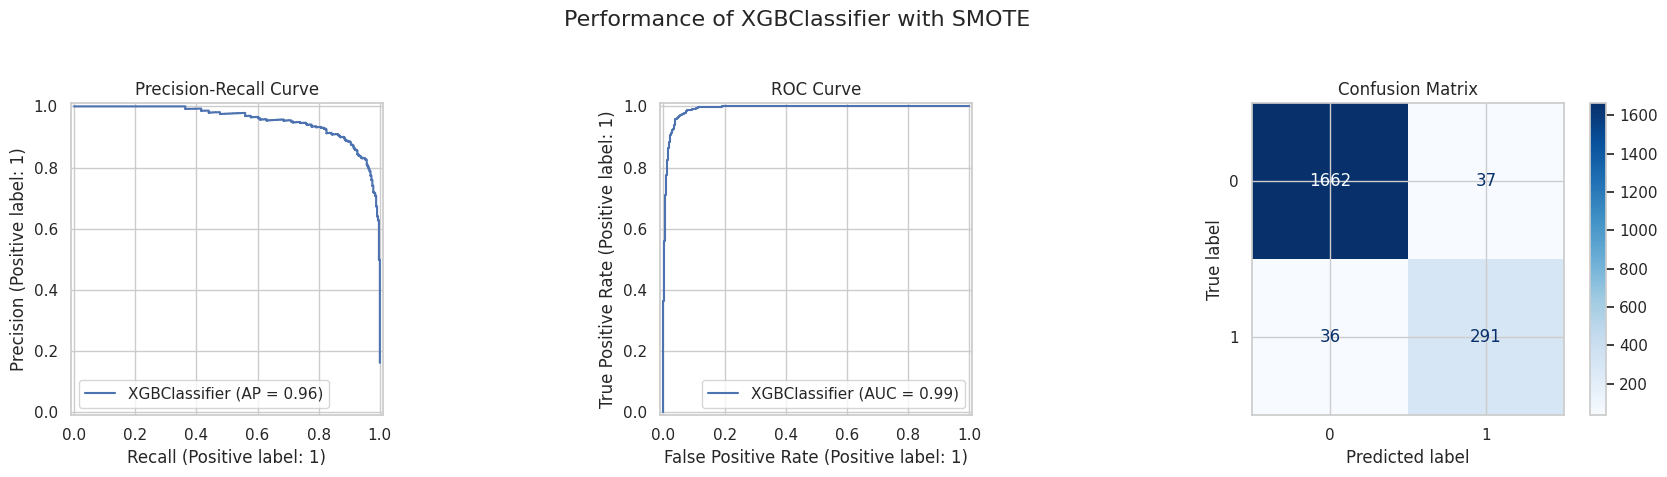

ROC-AUC Score (with SMOTE): 0.9913

Classification Report (with SMOTE):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.89      0.89      0.89       327

    accuracy                           0.96      2026
   macro avg       0.93      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026

------------------------------------------------------------


In [88]:
# Evaluate the XGBoost model using the SMOTE-balanced training data
train_and_evaluate_with_smote(
    classifier=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

**BEST Model: SMOTE-Boosted XGBoost**

The most successful model for predicting customer churn was **the XGBoost Classifier trained on a SMOTE-balanced dataset**. This combination proved to be the most effective due to two key factors:

**A Powerful Algorithm (XGBoost)**: XGBoost (Extreme Gradient Boosting) is an advanced and highly efficient machine learning algorithm. It builds its predictive power by training a sequence of models, where each new model corrects the errors of the previous one. This allows it to learn complex patterns in the data, leading to very high accuracy.

**Solving the Core Problem (SMOTE)**: The original dataset was highly imbalanced, with far more existing customers than churned customers (~84% to 16%). This can cause most models to become biased and perform poorly on the minority "churn" class. **By using the SMOTE (Synthetic Minority Over-sampling Technique), we created a balanced training set.** This forced the XGBoost model to learn the characteristics of at-risk customers just as well as it learned the loyal ones, drastically improving its predictive power where it mattered most.

The **synergy** between the powerful XGBoost algorithm and the SMOTE data-balancing technique created a model that was superior to all other approaches tested.

**Interpreting the Final Results**



**Overall Accuracy (96%**):
The model correctly predicted the outcome (churn or not churn) for 96% of customers. While a high number, accuracy alone can be misleading in imbalanced datasets.


----
**ROC-AUC Score (0.99)**:
This is an outstanding score that measures the model's ability to distinguish between the two classes. A score of 0.99 indicates that the model is extremely confident and reliable in separating customers who are likely to churn from those who are not.


-----
**Recall for Churned Customers (0.89)**: This is arguably the **most important metric** for this project.** It means the model successfully identified 89% of all customers who were actually at risk of leaving.** This is a huge win for the bank, as it allows them to proactively engage the vast majority of at-risk customers with targeted retention campaigns.


----------
**Precision for Churned Customers (0.89)**: This means that when the model predicted a customer would churn, it was correct 89% of the time. This ensures that the bank's retention efforts are highly efficient and not wasted on customers who were not actually planning to leave.


----------
**F1-Score for Churned Customers (0.89):** The F1-score represents a healthy balance between Precision and Recall. The high score of 0.89 confirms that the model is both highly accurate in its predictions and captures most of the customers who are about to churn.

**Project Conclusion**

This project successfully developed a highly accurate machine learning model to predict bank customer churn.

The process began with **comprehensive data cleaning and exploratory analysis,** where key insights were uncovered, most notably a significant class imbalance in the dataset. Through visualization and statistical analysis, we identified the most relevant customer attributes related to churn.

**Several machine learning models** were systematically trained and evaluated, including **Logistic Regression**, **Decision Trees**, and powerful** ensemble methods like Random Forest and XGBoost.** The critical step in achieving high performance was addressing the class imbalance by implementing the **SMOTE** (Synthetic Minority Over-sampling Technique).

The final and **best-performing model was an XGBoost Classifier** trained on the SMOTE-balanced data. This model significantly outperformed all others, achieving an exceptional recall of 89% and precision of 89% for at-risk customers. This means it can successfully identify the vast majority of customers who are about to churn while maintaining a high degree of accuracy.

**Ultimately, this project transformed a raw dataset into a reliable, actionable business tool capable of reducing customer churn and improving retention.**